In [1]:
import numpy as np
import pandas as pd

import datetime as dt
import plotnine as p9
from plotnine import ggplot, geom_point, aes, geom_line, element_text
from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [2]:
def plot_log_covid(county):
    temp_df = df[df['name']==county]
    
    temp_plot = (ggplot(temp_df, aes('sampling_week', 'effective_concentration_rolling_average', group=1))
     + geom_point()
     + geom_line()
     + p9.scale_x_datetime(breaks=date_breaks('1 month'), labels=date_format('%D'), name='Date')
     + p9.scale_y_log10(name = 'Rolling average COVID concentration in wastewater')
     + p9.ggtitle(f'Log Scale {county} COVID Wastewater Data up to {temp_df.sampling_week.to_list()[-1]}')
     + p9.theme(
         figure_size=(24,12),
         axis_title=element_text(size=14),
         plot_title=element_text(size=18),
         axis_text_x=element_text(size=7)
         )
    )
    
    return(temp_plot)

def plot_linear_covid(county):
    temp_df = df[df['name']==county]
    
    temp_plot = (ggplot(temp_df, aes('sampling_week', 'effective_concentration_rolling_average', group=1))
     + geom_point()
     + geom_line()
     + p9.scale_x_datetime(breaks=date_breaks('1 month'), labels=date_format('%D'), name='Date')
     + p9.labels.ylab('Rolling average COVID concentration in wastewater')
     + p9.ggtitle(f'Linear Scale {county} COVID Wastewater Data up to {temp_df.sampling_week.to_list()[-1]}')
     + p9.theme(
         figure_size=(24,12),
         axis_title=element_text(size=14),
         plot_title=element_text(size=18),
         axis_text_x=element_text(size=7)
         )
    )
    
    return(temp_plot)

In [3]:
df = pd.read_csv('~/projects/covid/wastewater_by_county.csv')

In [31]:
last_update = df[df['name'] == 'Suffolk County, MA']['sampling_week'].to_list()[-1]

In [33]:
last_update

'2022-08-17'

In [4]:
df

,Unnamed: 0,sampling_week,effective_concentration_rolling_average,region,state,name,fipscode
0,0,2020-01-01,134.841964,Midwest,IL,"Peoria County, IL",17143
1,1,2020-01-15,0.000000,Northeast,MA,"Suffolk County, MA",25025
2,2,2020-01-22,0.000000,Northeast,MA,"Suffolk County, MA",25025
3,3,2020-01-29,0.000000,Northeast,MA,"Suffolk County, MA",25025
4,4,2020-02-05,0.000000,Northeast,MA,"Suffolk County, MA",25025
...,...,...,...,...,...,...,...
7325,7465,2022-08-17,685.503445,South,VA,"Wise County, VA",51195
7326,7466,2022-08-17,796.273321,Midwest,IA,"Woodbury County, IA",19193
7327,7467,2022-08-17,1042.085544,Northeast,MA,"Worcester County, MA",25027
7328,7468,2022-08-17,506.211591,West,AZ,"Yavapai County, AZ",4025


In [19]:
df[df['state']=='MA'].name.value_counts()

Suffolk County, MA       136
Essex County, MA         103
Nantucket County, MA     100
Hampshire County, MA      99
Middlesex County, MA      93
Berkshire County, MA      85
Worcester County, MA      62
Plymouth County, MA       57
Barnstable County, MA     57
Bristol County, MA        47
Franklin County, MA       14
Hampden County, MA        13
Name: name, dtype: int64

In [44]:
ma_counties = df[df['state']=='MA'].name.value_counts().index.to_list()

In [45]:
ma_counties

['Suffolk County, MA',
 'Essex County, MA',
 'Nantucket County, MA',
 'Hampshire County, MA',
 'Middlesex County, MA',
 'Berkshire County, MA',
 'Worcester County, MA',
 'Plymouth County, MA',
 'Barnstable County, MA',
 'Bristol County, MA',
 'Franklin County, MA',
 'Hampden County, MA']

In [28]:
ma_counties = ma_counties.to_list()

In [29]:
county_data = {}

In [34]:
for county in ma_counties:
    county_name = county.split()[0].lower()
    print(county_name)
    log_save_string = f"figures/{county_name}_log_{last_update}.jpg"
    linear_save_string = f"figures/{county_name}_linear_{last_update}.jpg"
    
    logPlot = plot_log_covid(county)
    logPlot.save(log_save_string, dpi=300)
    linearPlot = plot_linear_covid(county)
    linearPlot.save(linear_save_string, dpi=300)

    county_data[county] = {'log': log_save_string, 'linear':linear_save_string}

suffolk


C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/suffolk_log_2022-08-17.jpg
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/suffolk_linear_2022-08-17.jpg


essex


C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/essex_log_2022-08-17.jpg
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/essex_linear_2022-08-17.jpg


nantucket


C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/nantucket_log_2022-08-17.jpg
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/nantucket_linear_2022-08-17.jpg


hampshire


C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/hampshire_log_2022-08-17.jpg
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/hampshire_linear_2022-08-17.jpg


middlesex


C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/middlesex_log_2022-08-17.jpg
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/middlesex_linear_2022-08-17.jpg


berkshire


C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/berkshire_log_2022-08-17.jpg
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/berkshire_linear_2022-08-17.jpg


worcester


C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/worcester_log_2022-08-17.jpg
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/worcester_linear_2022-08-17.jpg


plymouth


C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/plymouth_log_2022-08-17.jpg
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/plymouth_linear_2022-08-17.jpg


barnstable


C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/barnstable_log_2022-08-17.jpg
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/barnstable_linear_2022-08-17.jpg


bristol


C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/bristol_log_2022-08-17.jpg
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/bristol_linear_2022-08-17.jpg


franklin


C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/franklin_log_2022-08-17.jpg
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/franklin_linear_2022-08-17.jpg


hampden


C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/hampden_log_2022-08-17.jpg
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 24 x 12 in image.
C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: figures/hampden_linear_2022-08-17.jpg


In [37]:
county_data[ma_counties[0]]['log']

'figures/suffolk_log_2022-08-17.jpg'

In [39]:
county.split()[0]

'Hampden'

In [42]:
images = []
for county in ma_counties:
    images.append({'image_path': county_data[county]['log'], 'caption': f'{county.split()[0]} County Log Plot'})
    images.append({'image_path': county_data[county]['linear'], 'caption': f'{county.split()[0]} County Linear Plot'})    

In [43]:
images

[{'image_path': 'figures/suffolk_log_2022-08-17.jpg',
  'caption': 'Suffolk County Log Plot'},
 {'image_path': 'figures/suffolk_linear_2022-08-17.jpg',
  'caption': 'Suffolk County Linear Plot'},
 {'image_path': 'figures/essex_log_2022-08-17.jpg',
  'caption': 'Essex County Log Plot'},
 {'image_path': 'figures/essex_linear_2022-08-17.jpg',
  'caption': 'Essex County Linear Plot'},
 {'image_path': 'figures/nantucket_log_2022-08-17.jpg',
  'caption': 'Nantucket County Log Plot'},
 {'image_path': 'figures/nantucket_linear_2022-08-17.jpg',
  'caption': 'Nantucket County Linear Plot'},
 {'image_path': 'figures/hampshire_log_2022-08-17.jpg',
  'caption': 'Hampshire County Log Plot'},
 {'image_path': 'figures/hampshire_linear_2022-08-17.jpg',
  'caption': 'Hampshire County Linear Plot'},
 {'image_path': 'figures/middlesex_log_2022-08-17.jpg',
  'caption': 'Middlesex County Log Plot'},
 {'image_path': 'figures/middlesex_linear_2022-08-17.jpg',
  'caption': 'Middlesex County Linear Plot'},
 {'i

Suffolk County, MA


C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10


Essex County, MA
Nantucket County, MA


C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10


Hampshire County, MA


C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10


Middlesex County, MA
Berkshire County, MA


C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10


Worcester County, MA
Plymouth County, MA
Barnstable County, MA
Bristol County, MA
Franklin County, MA


C:\Users\takee\Anaconda3\envs\tads\lib\site-packages\plotnine\ggplot.py:365: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Hampden County, MA


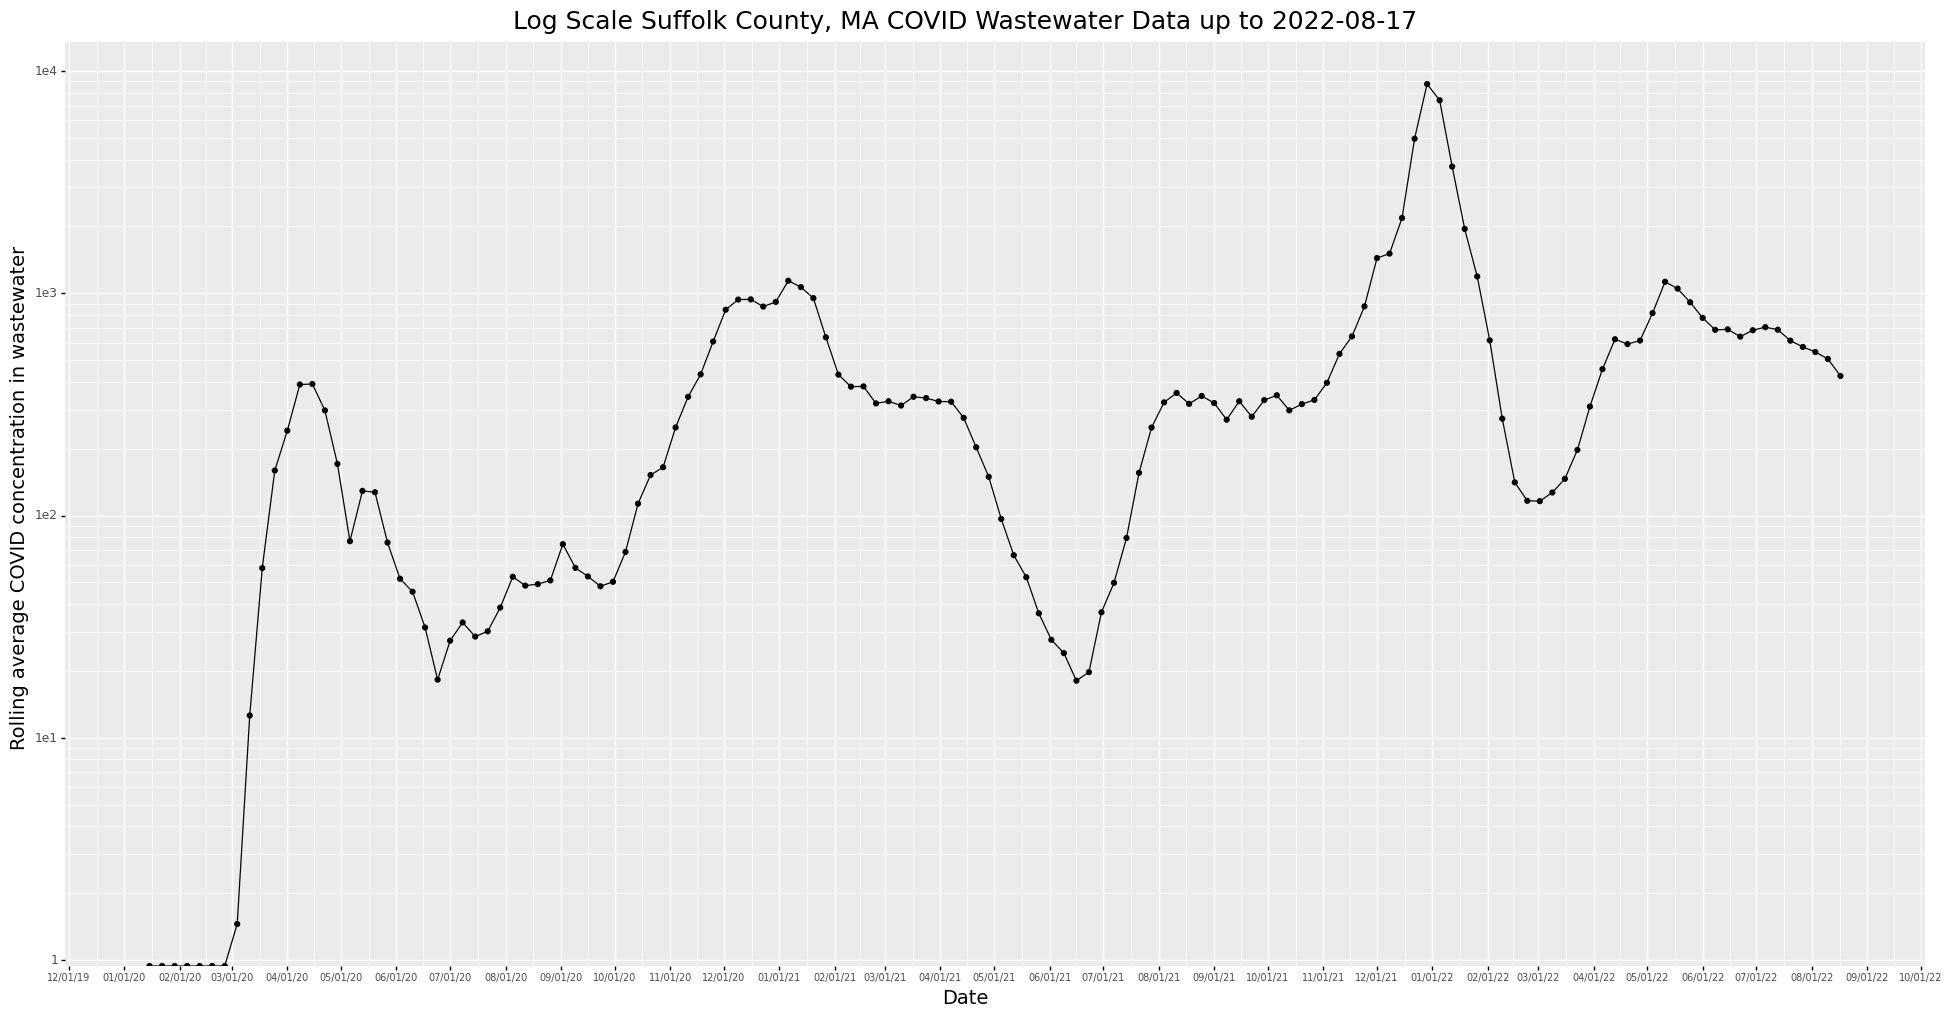

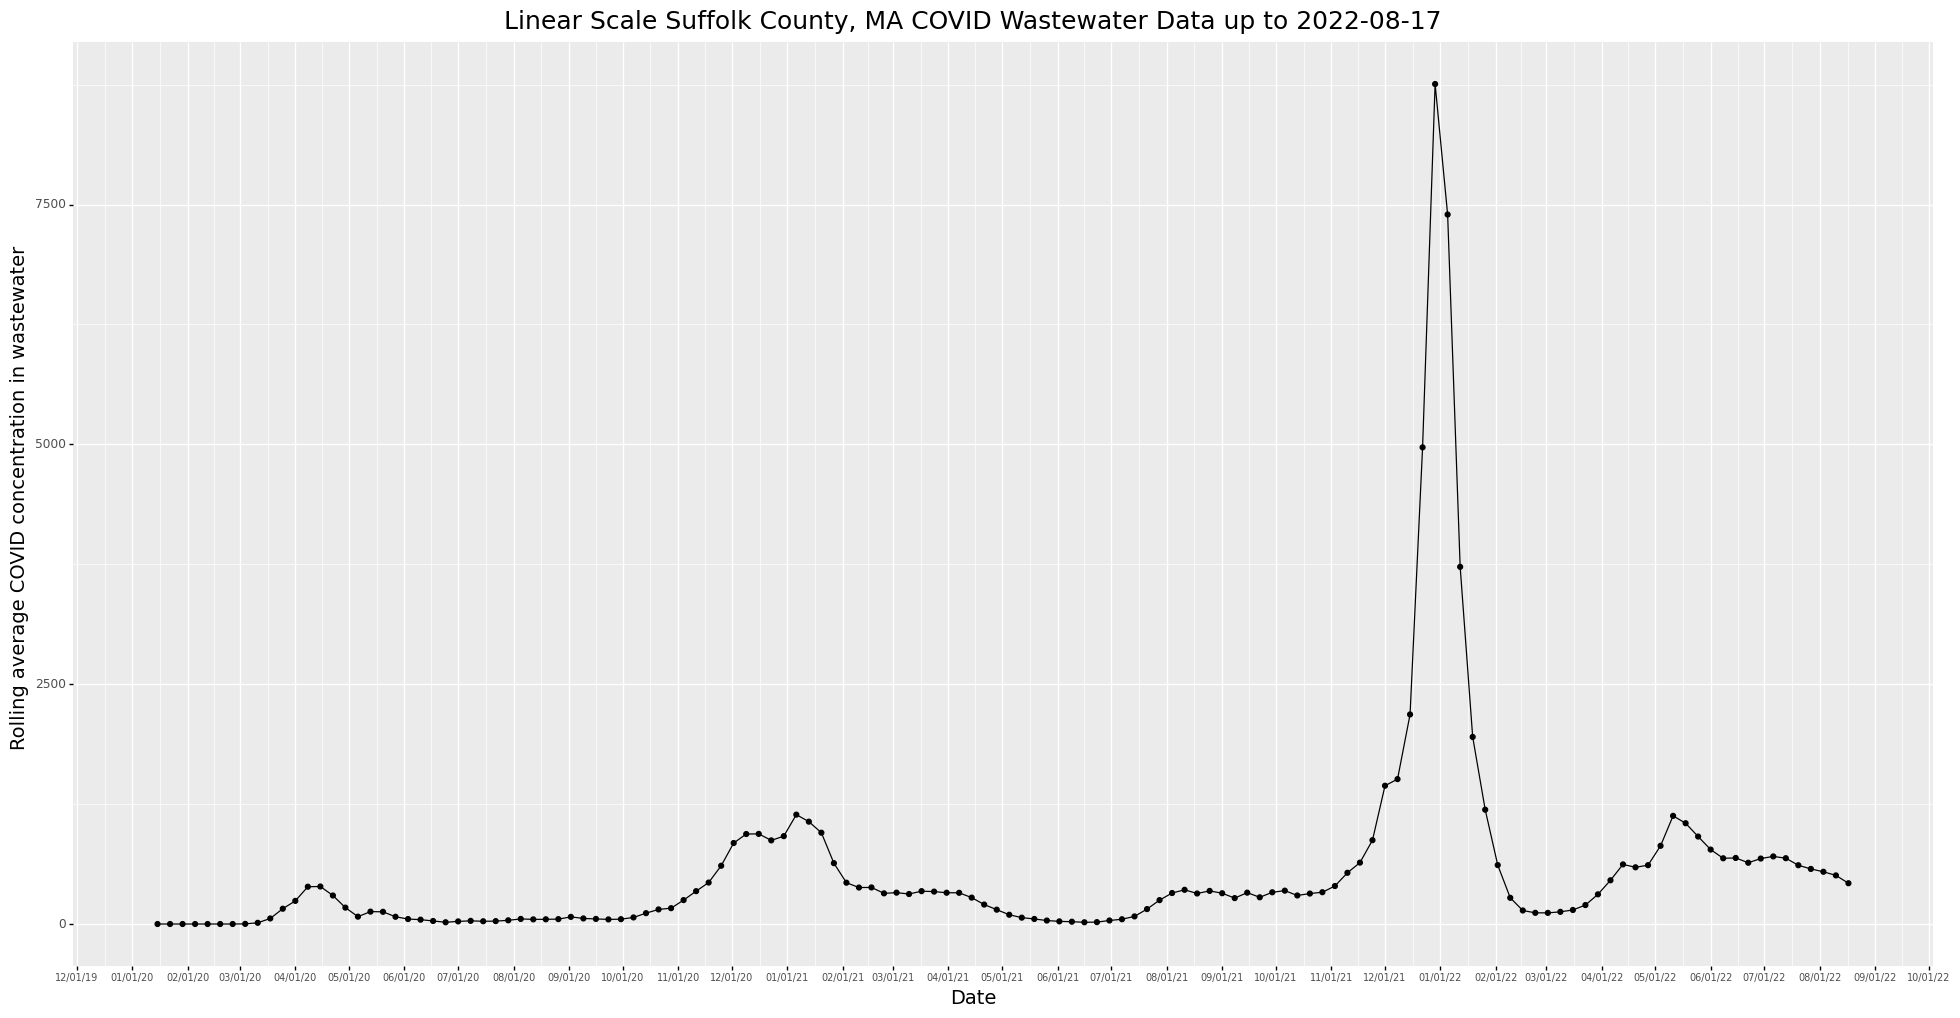

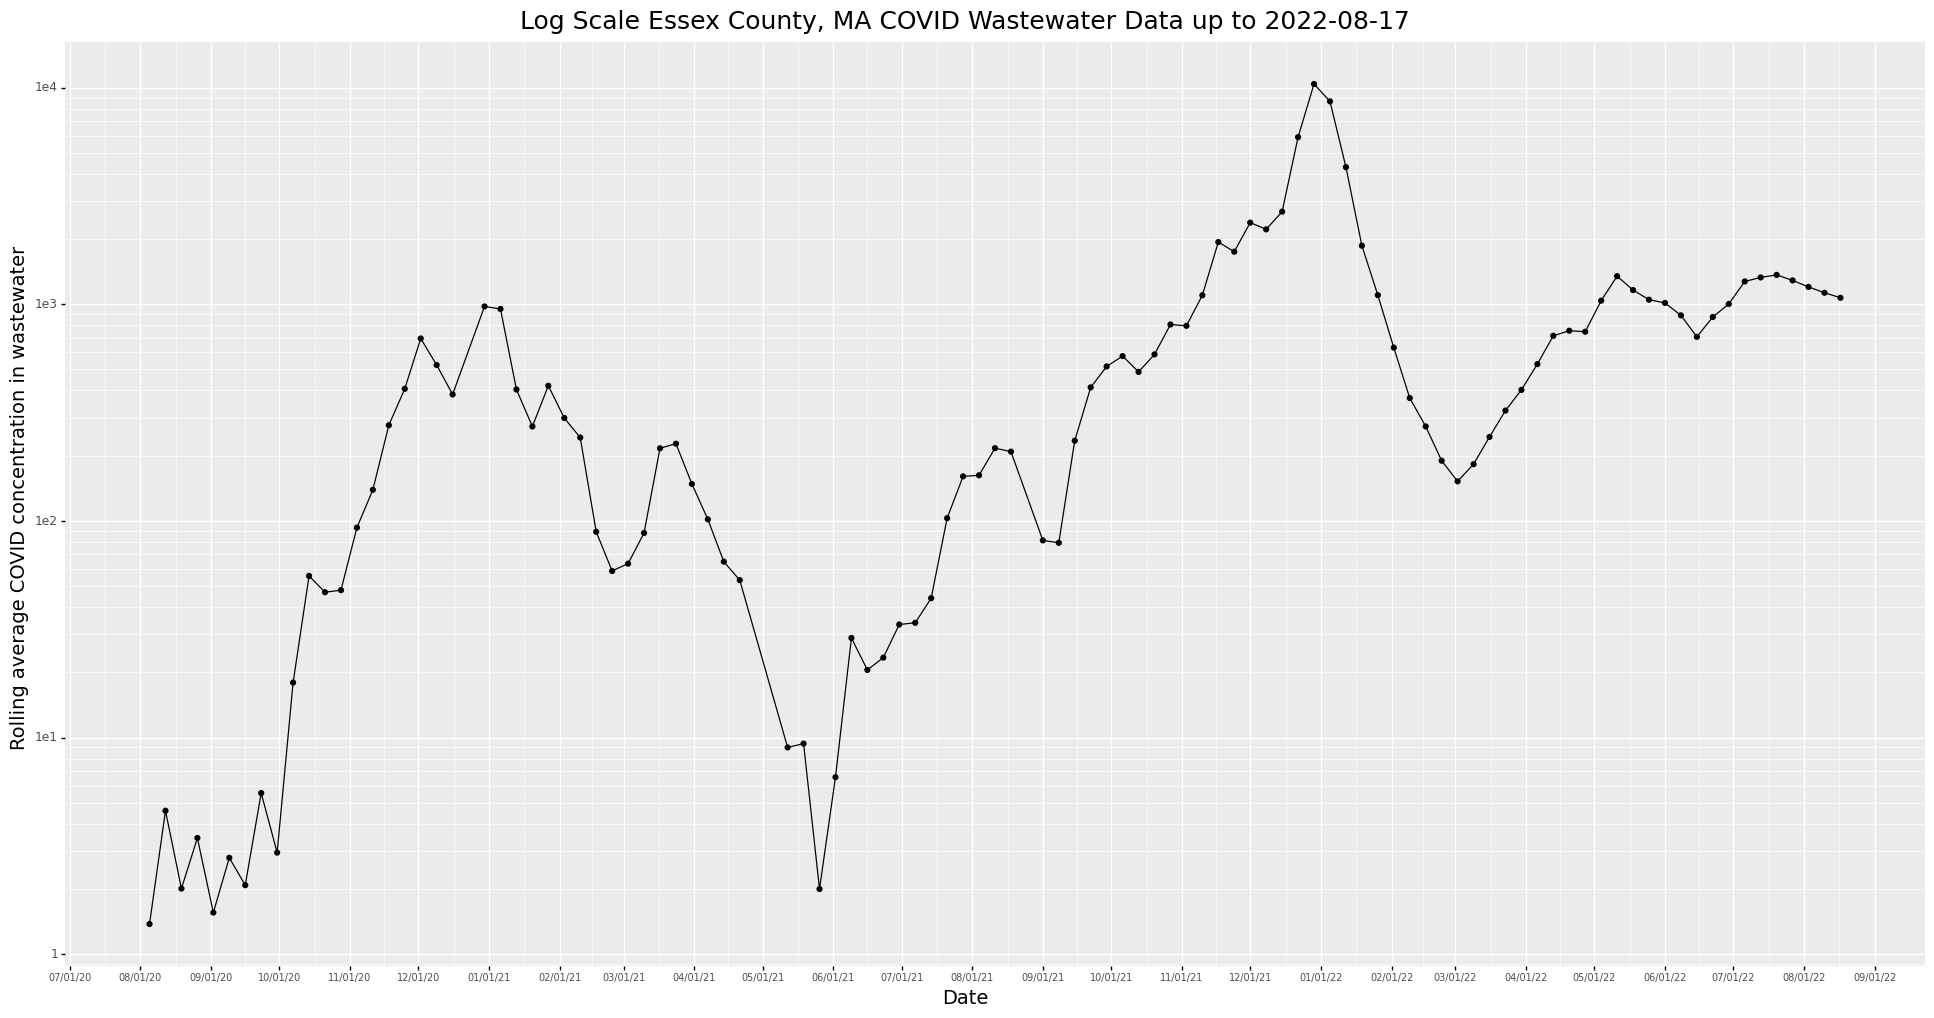

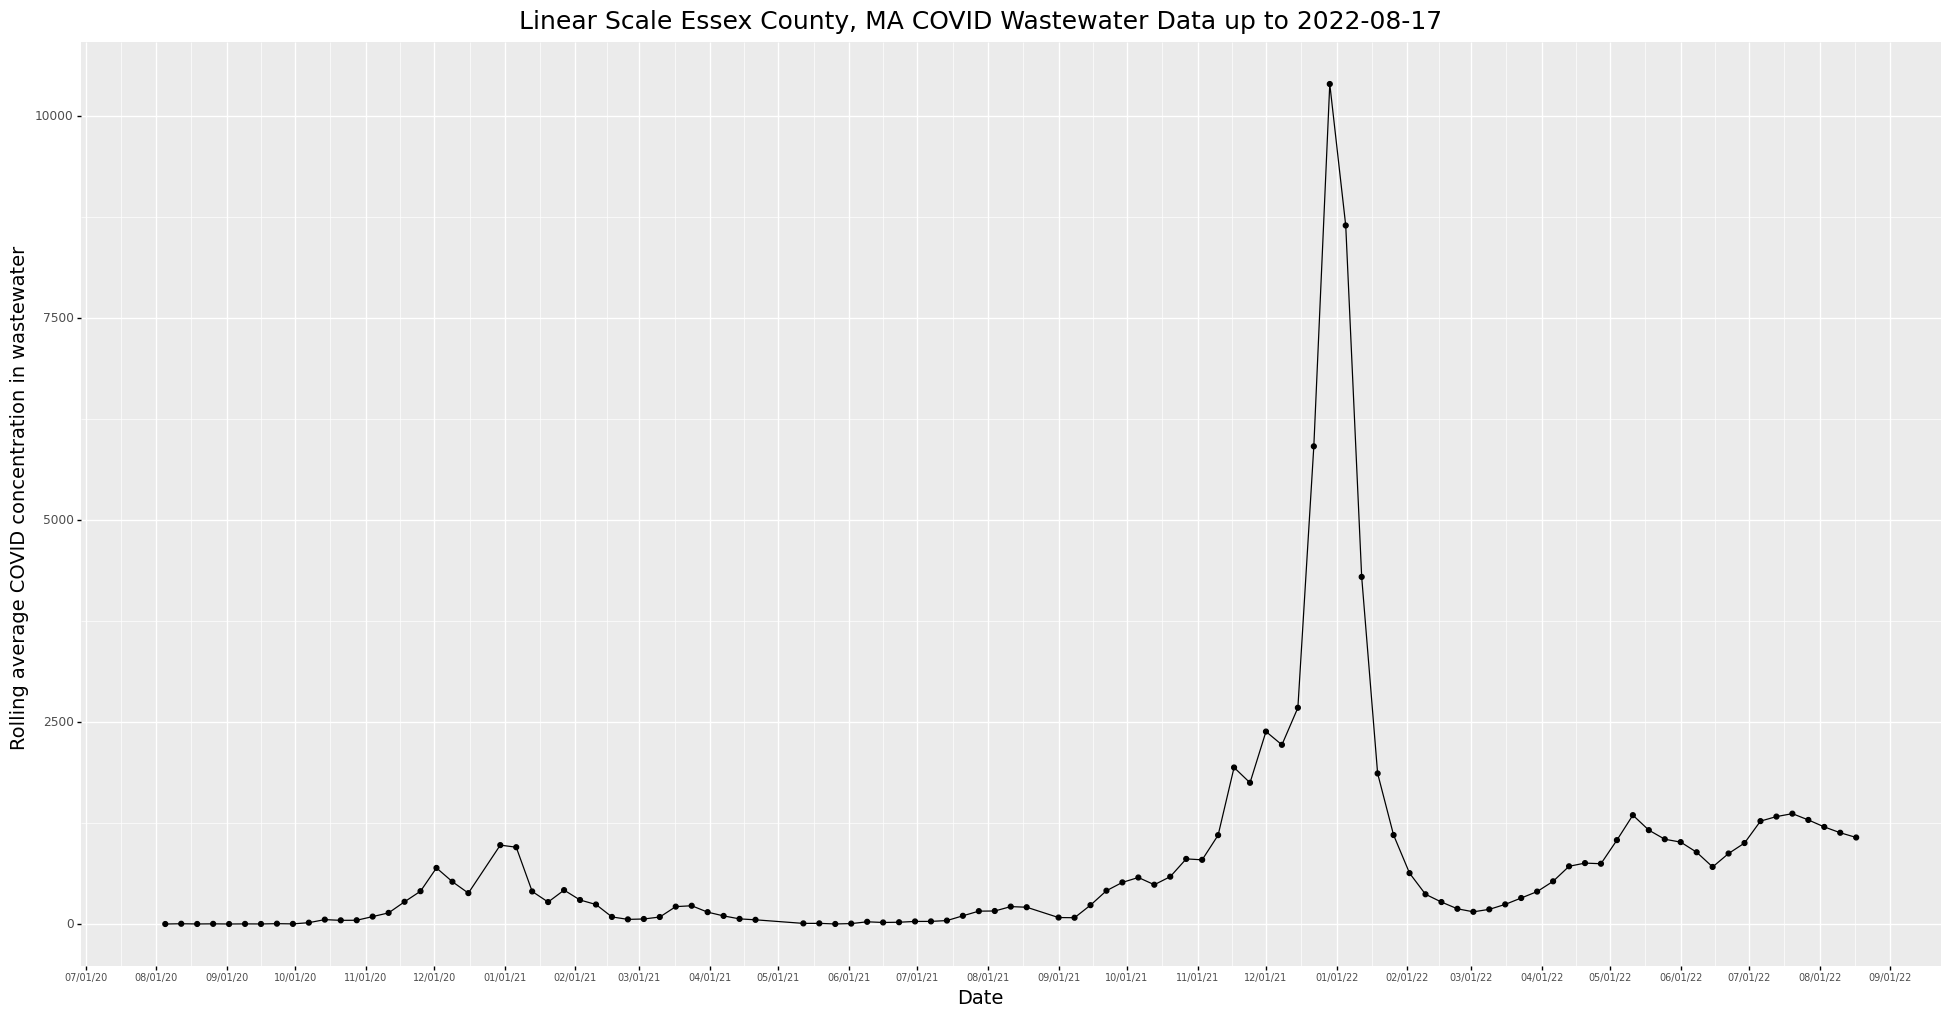

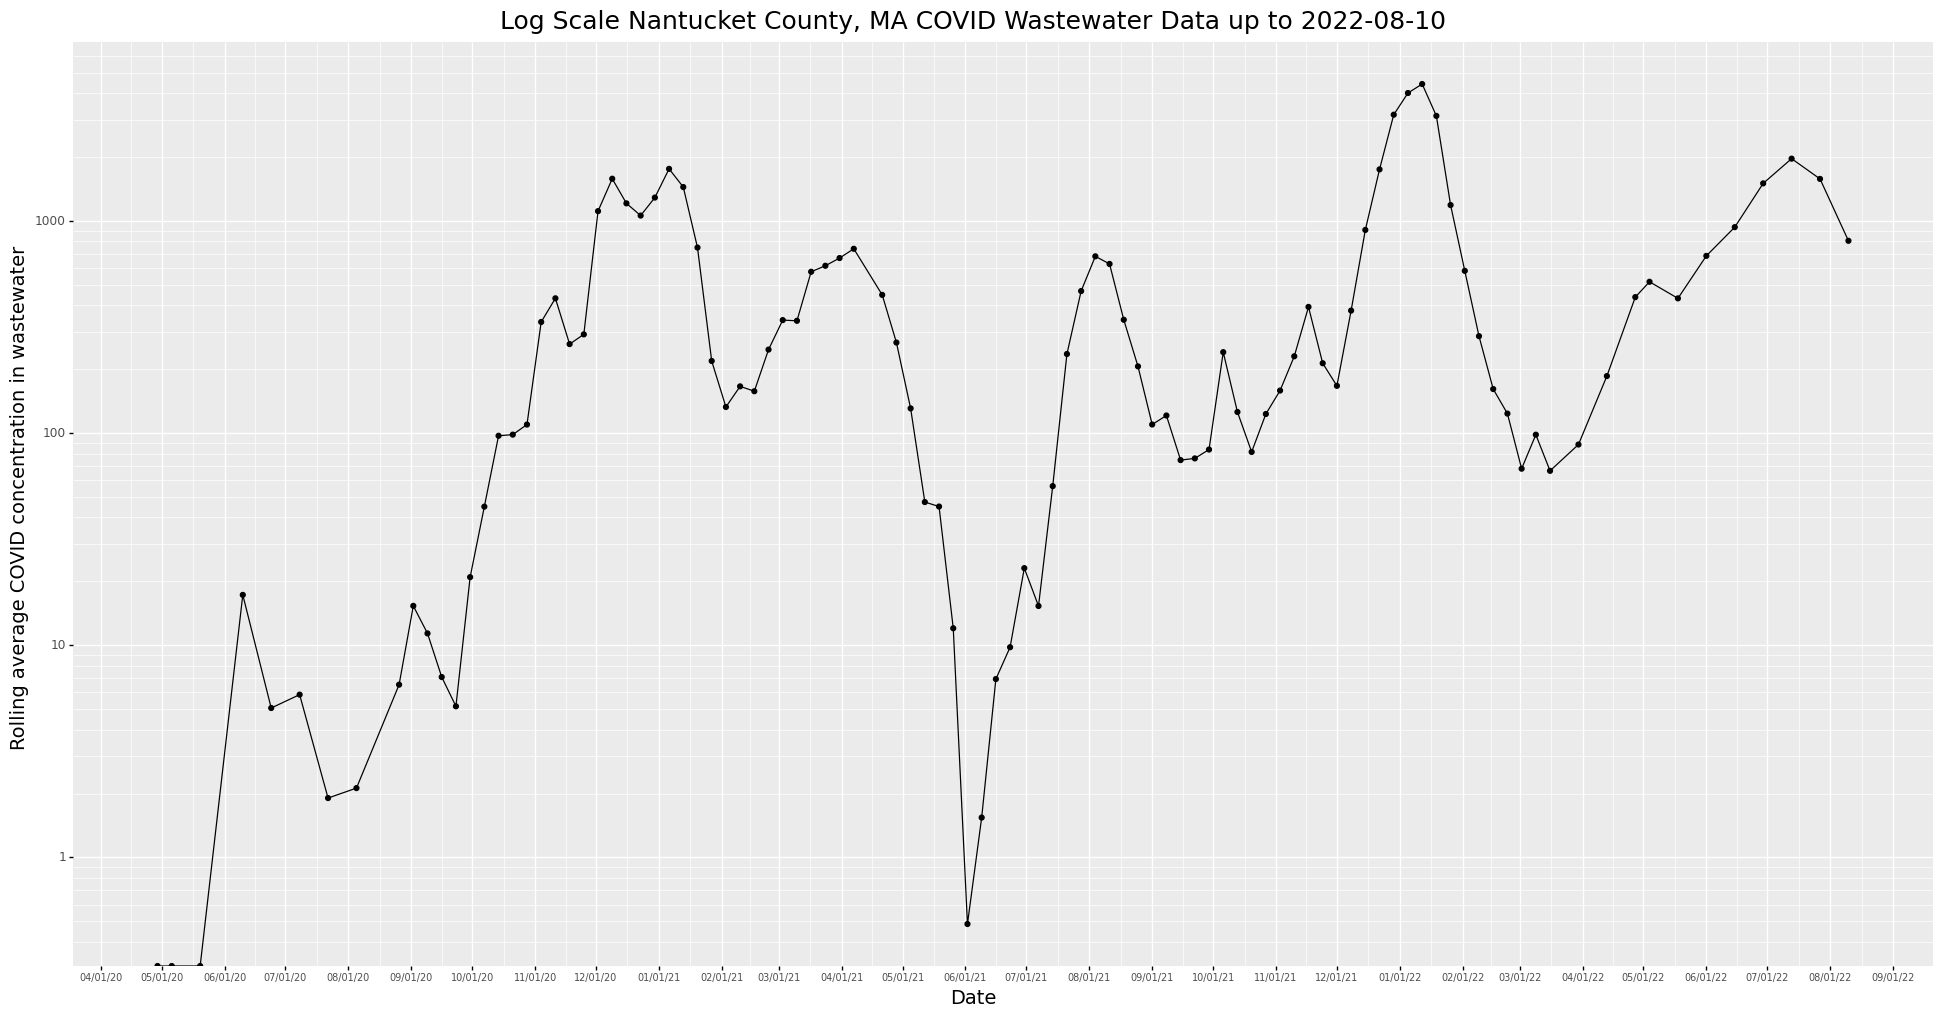

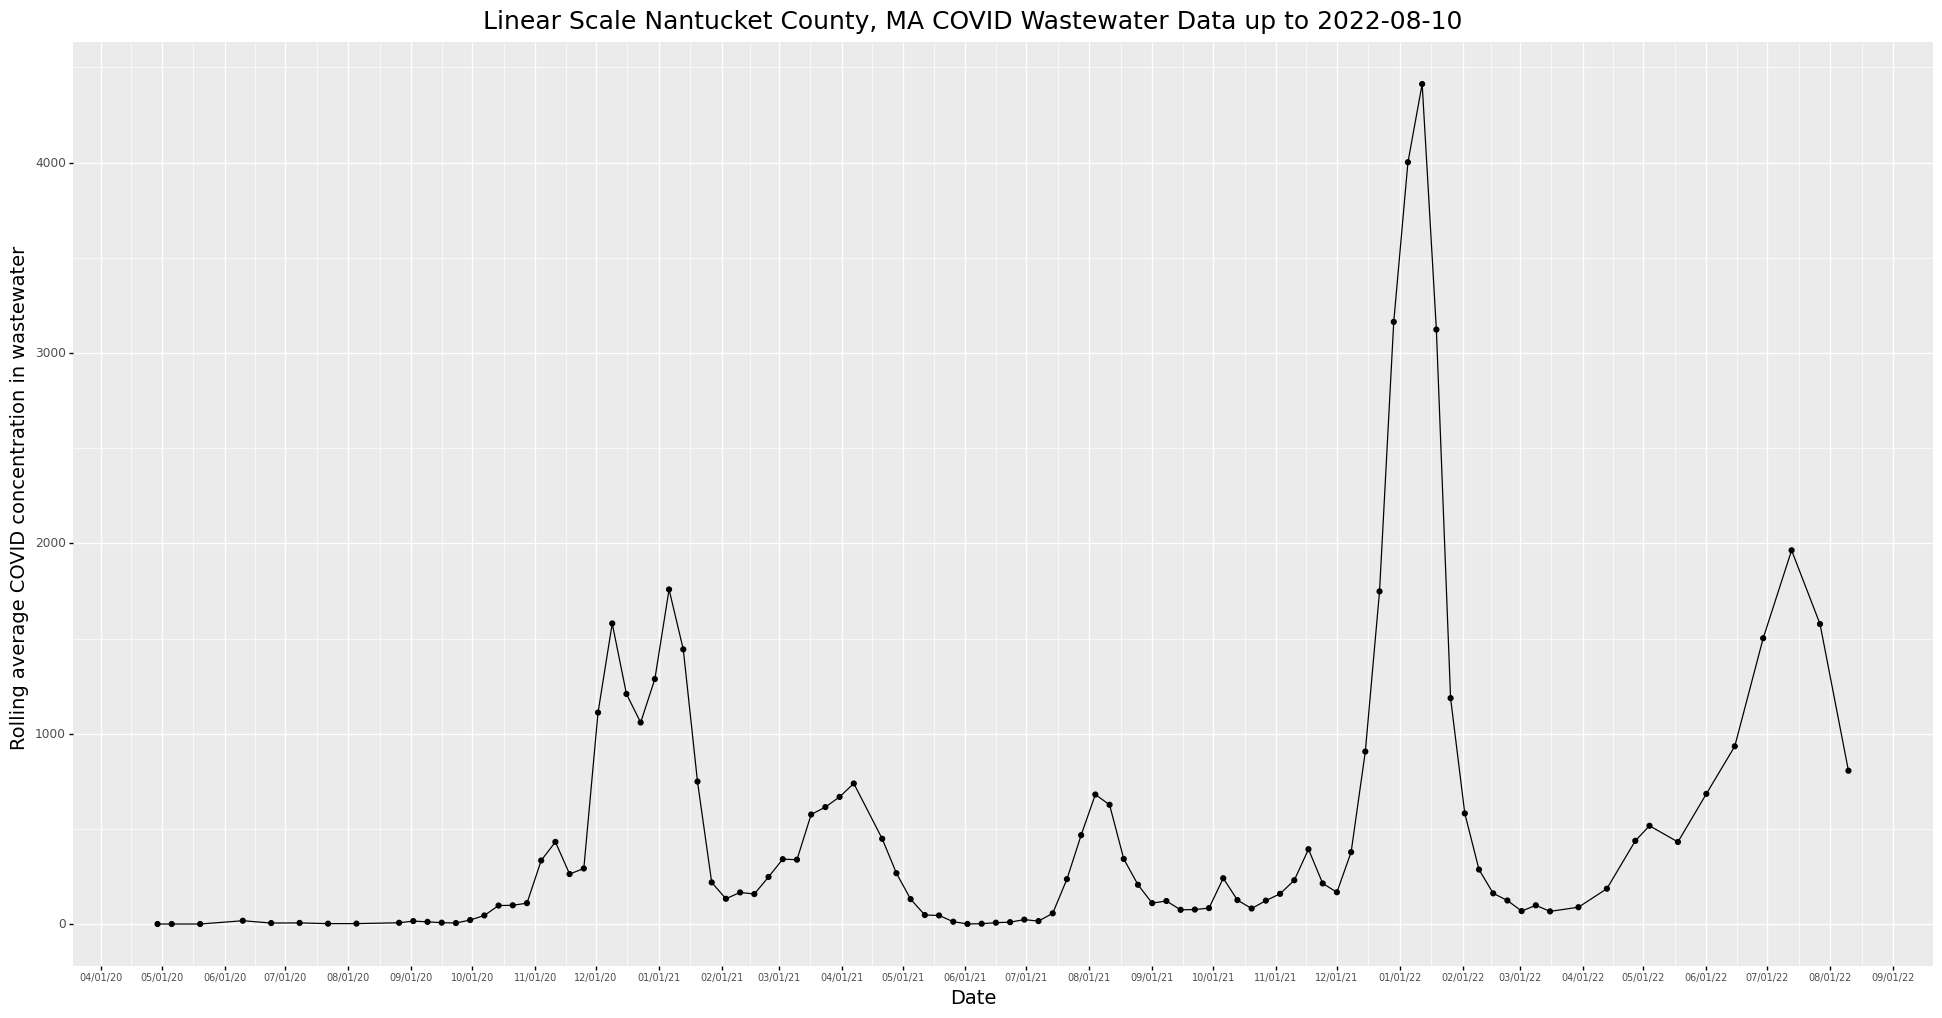

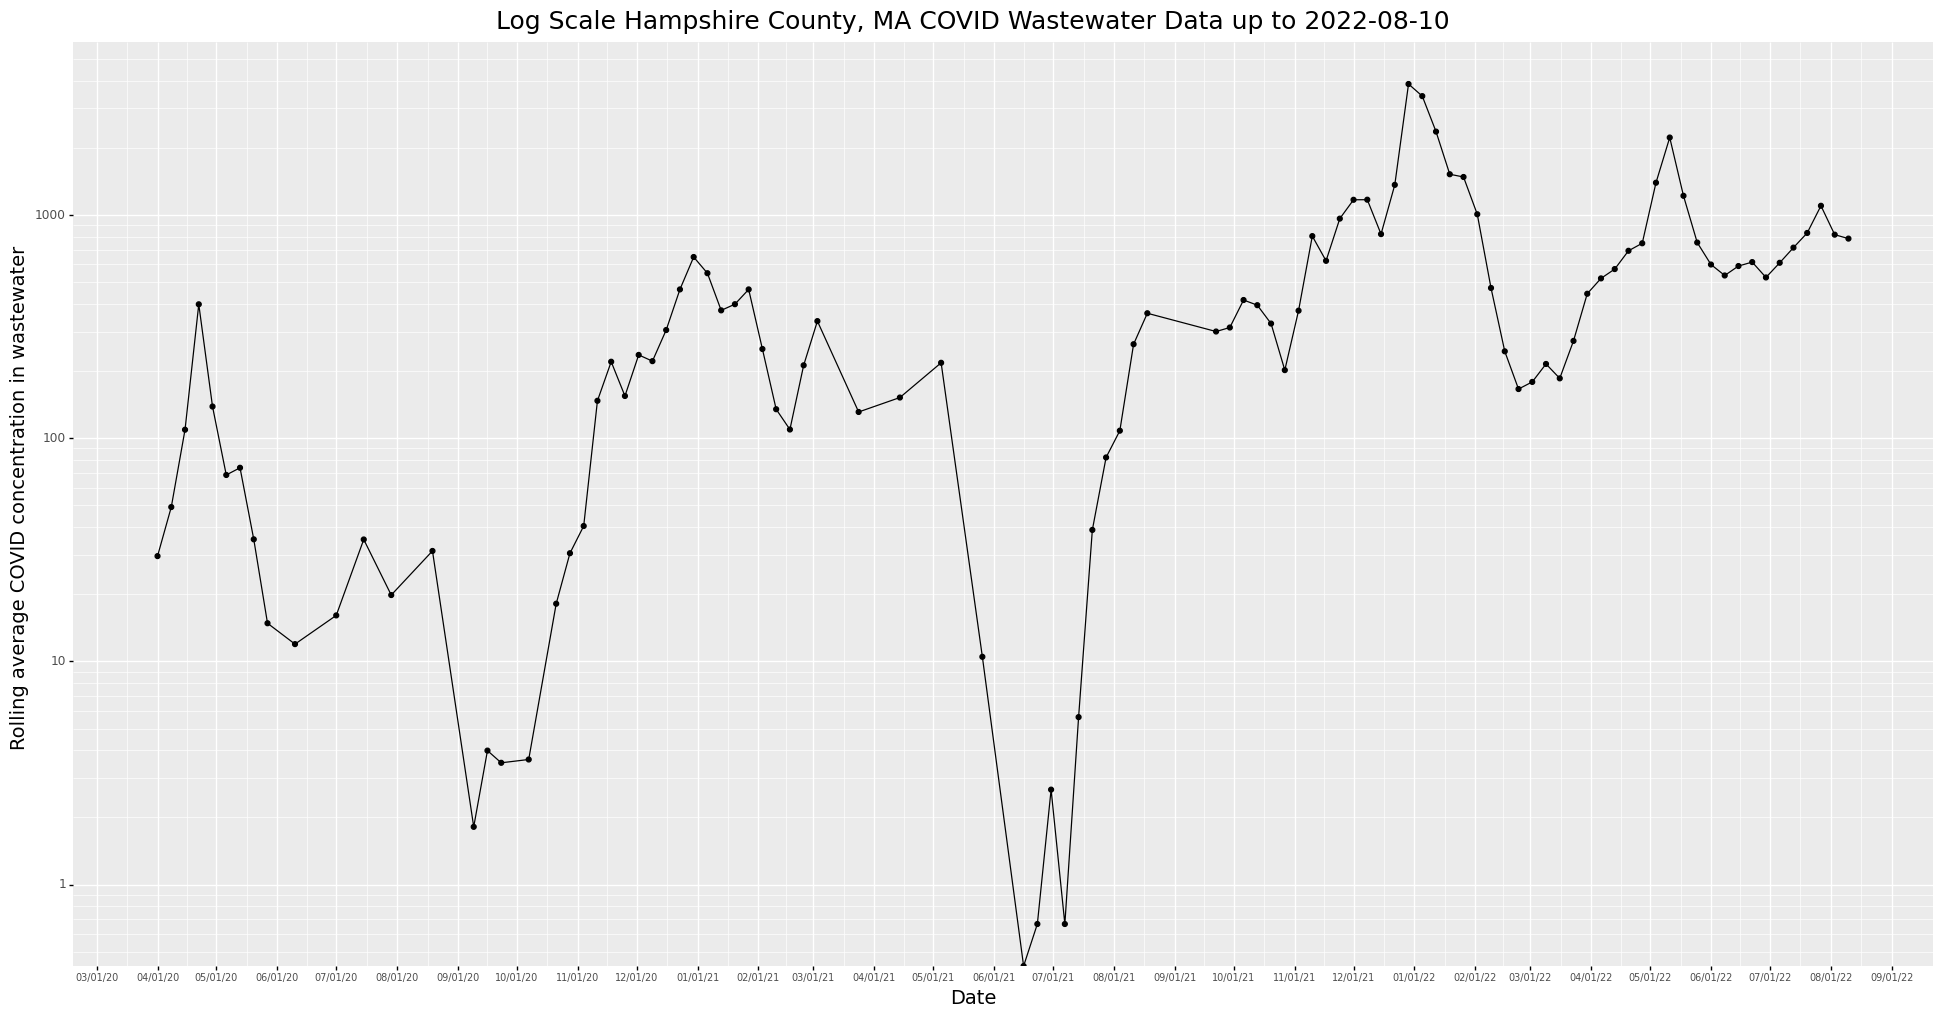

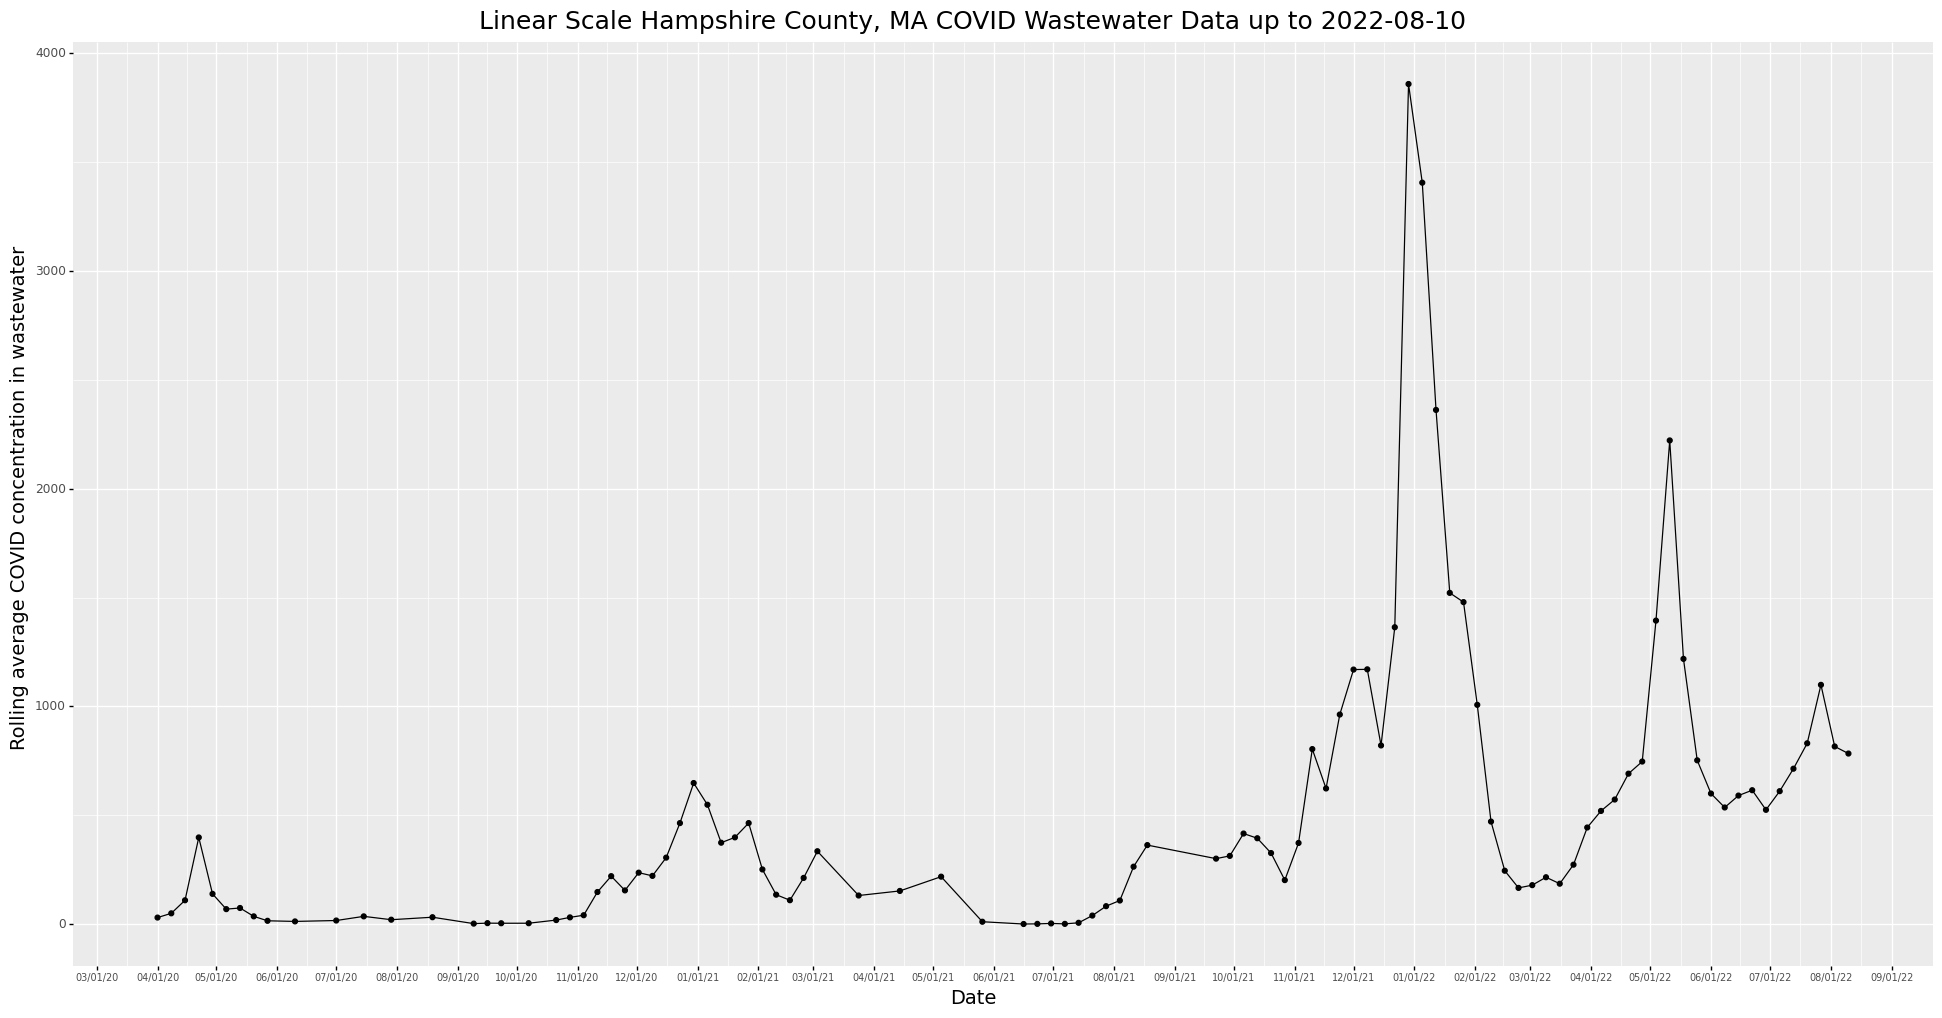

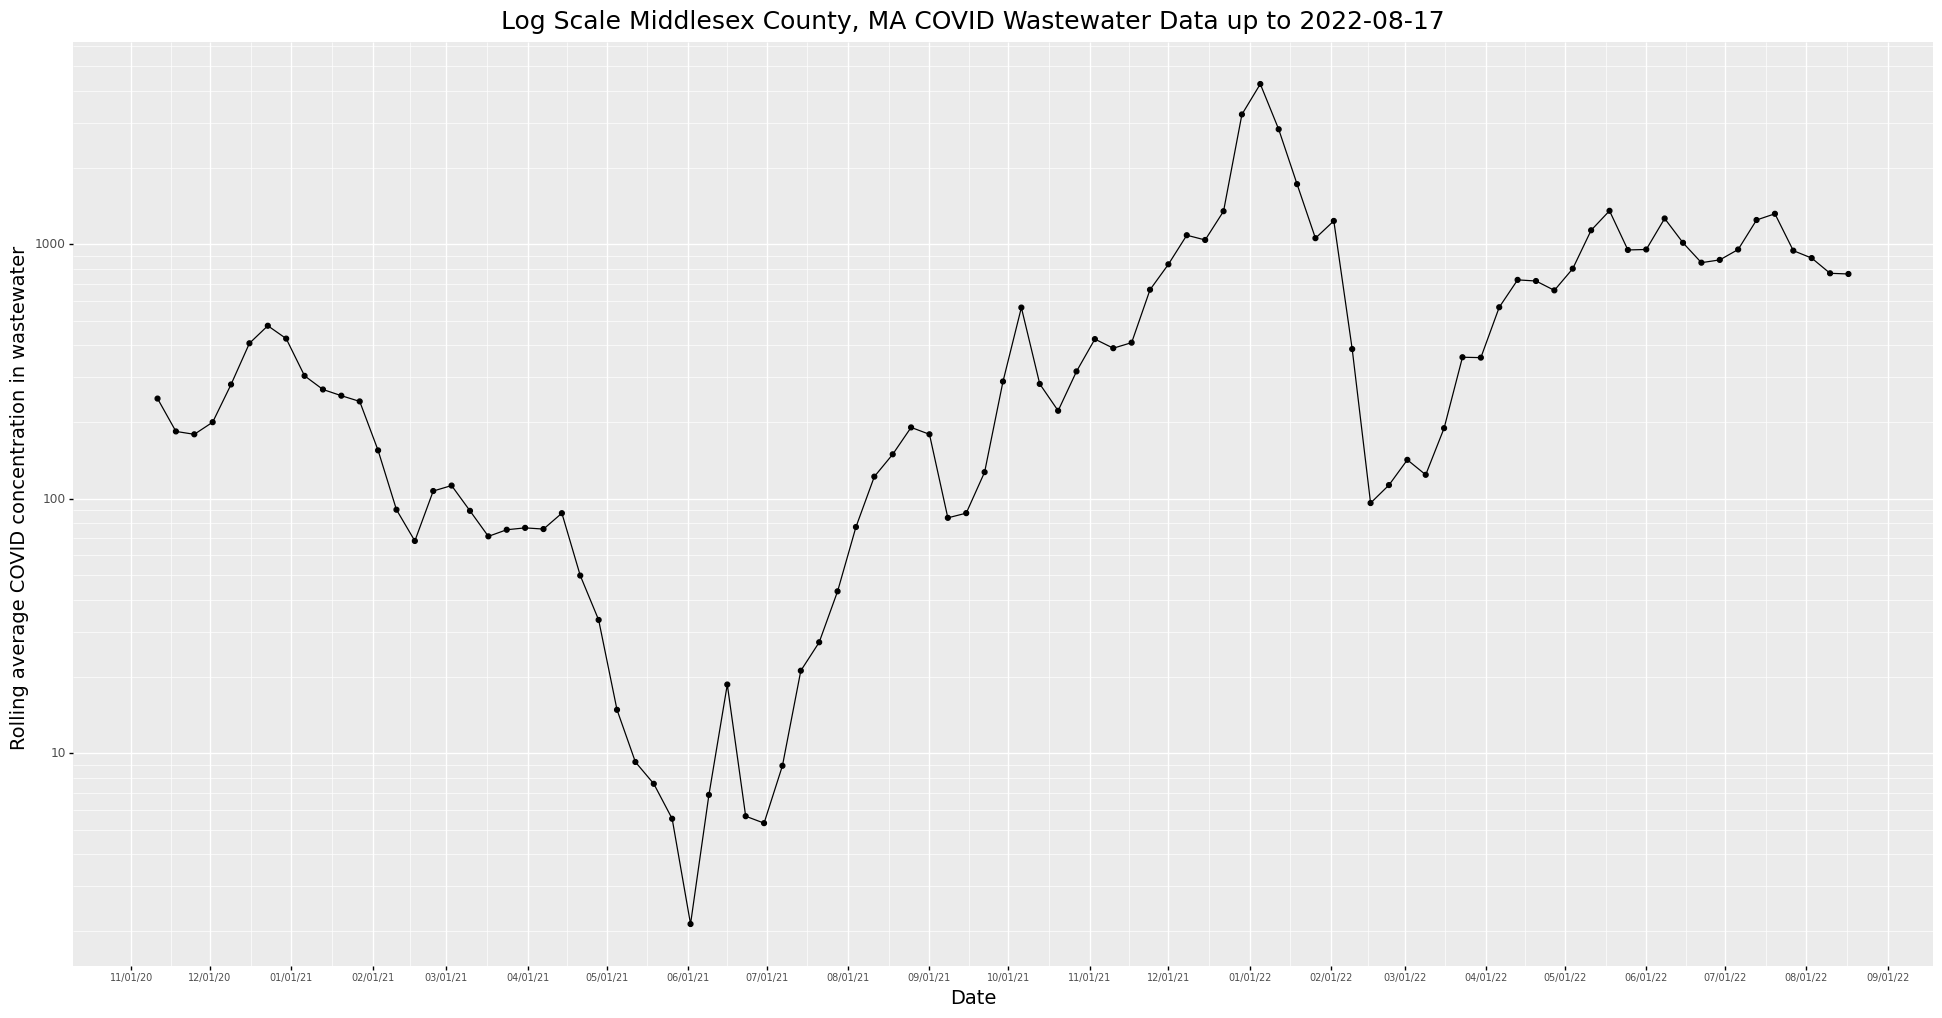

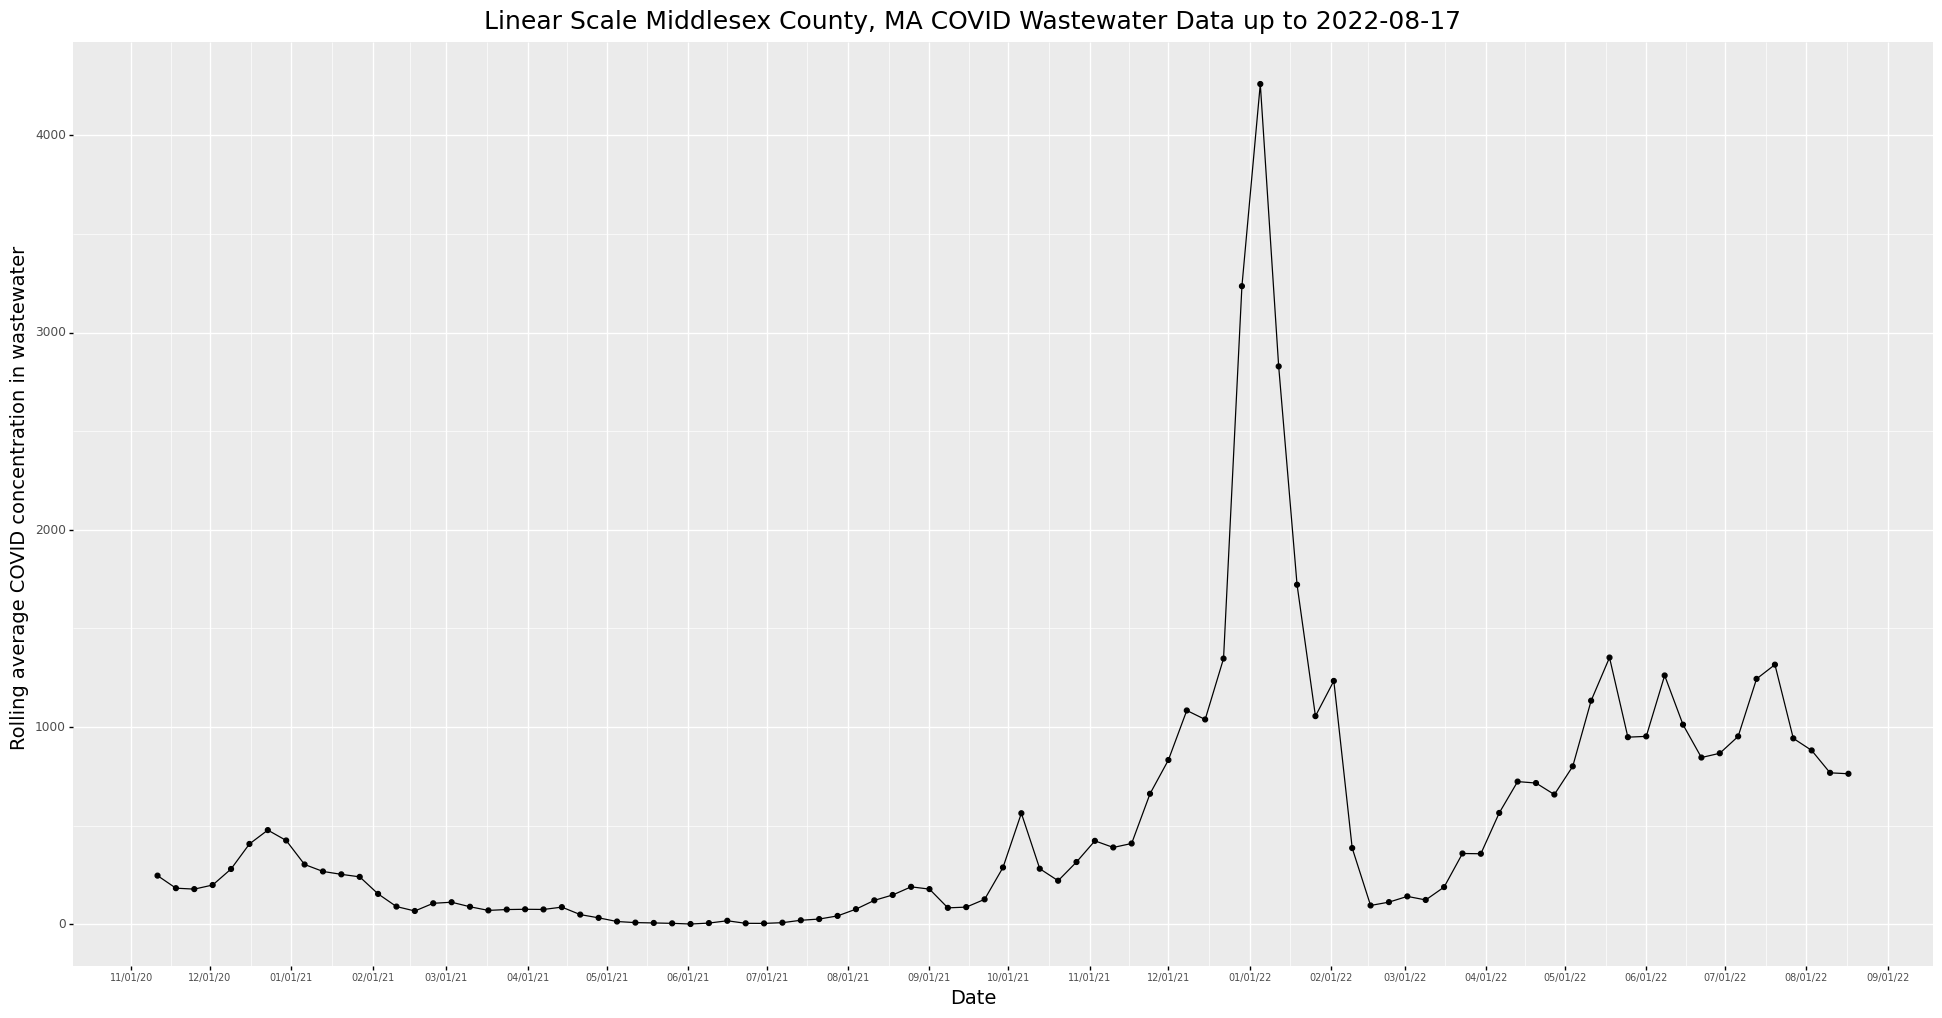

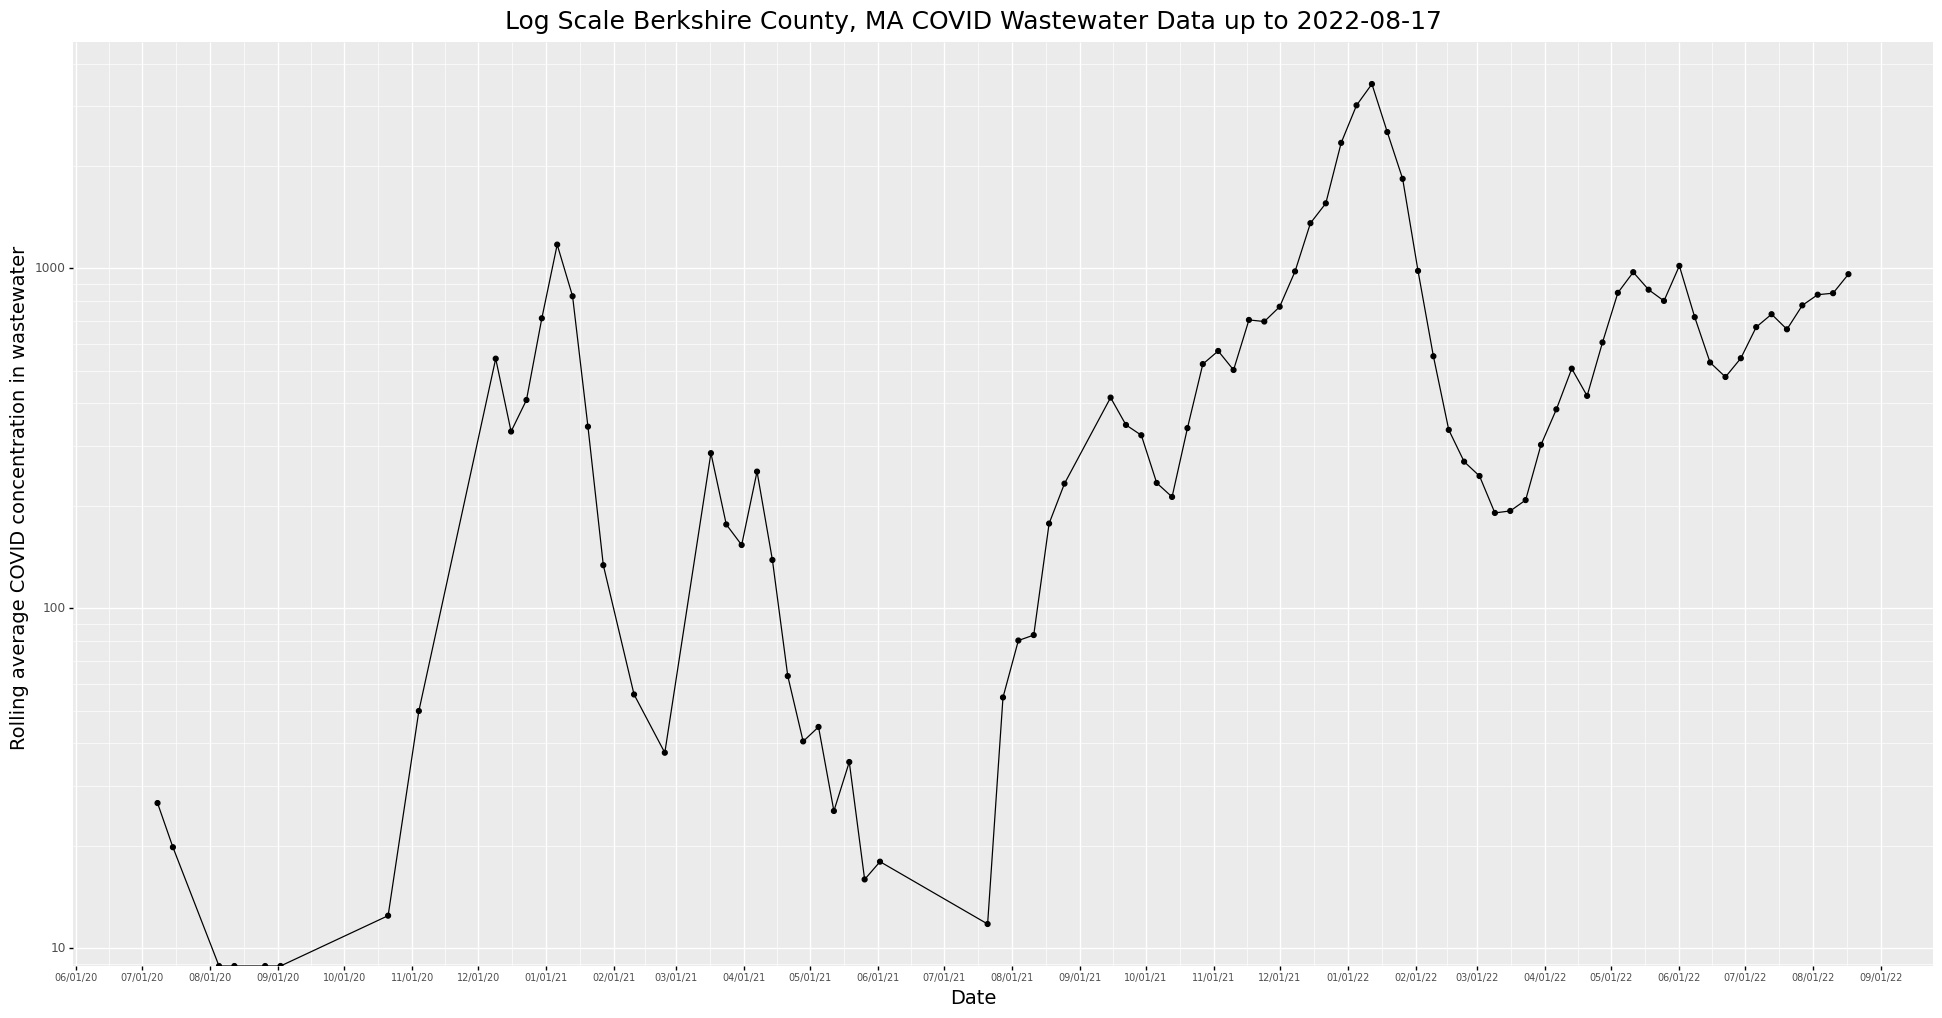

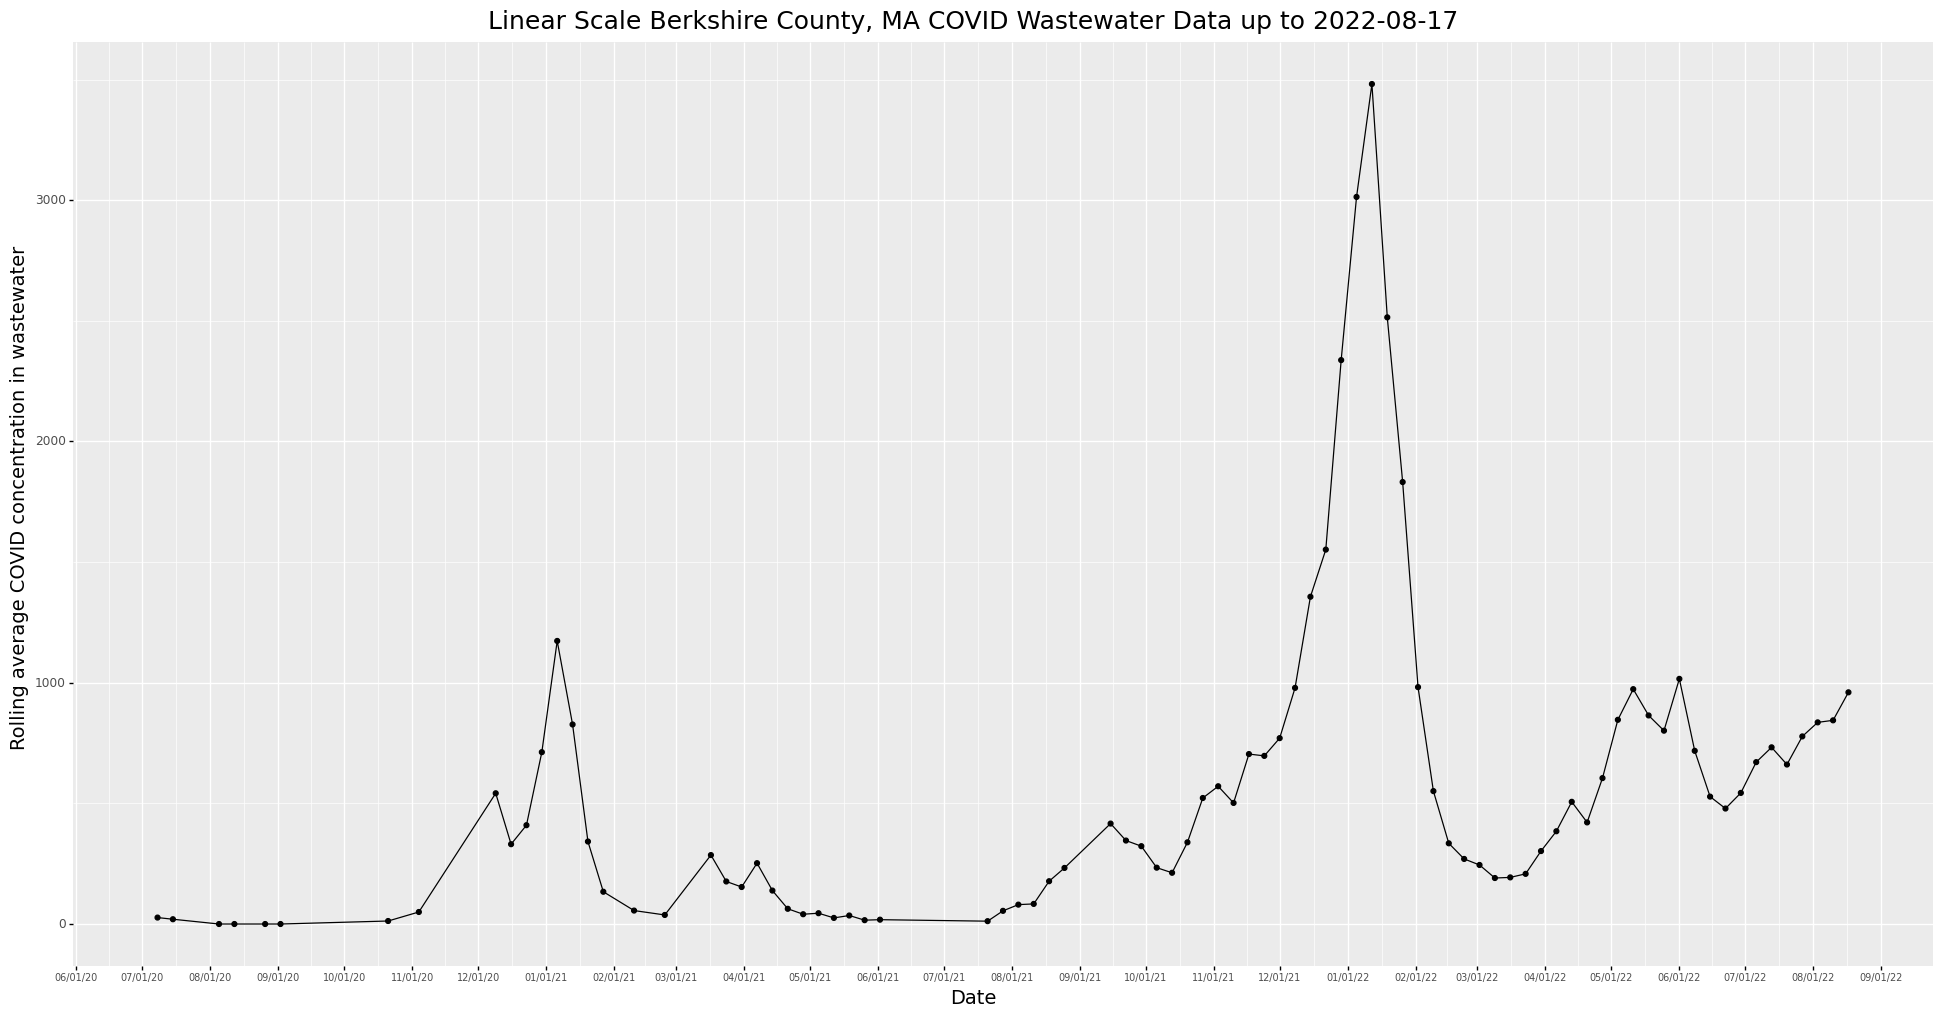

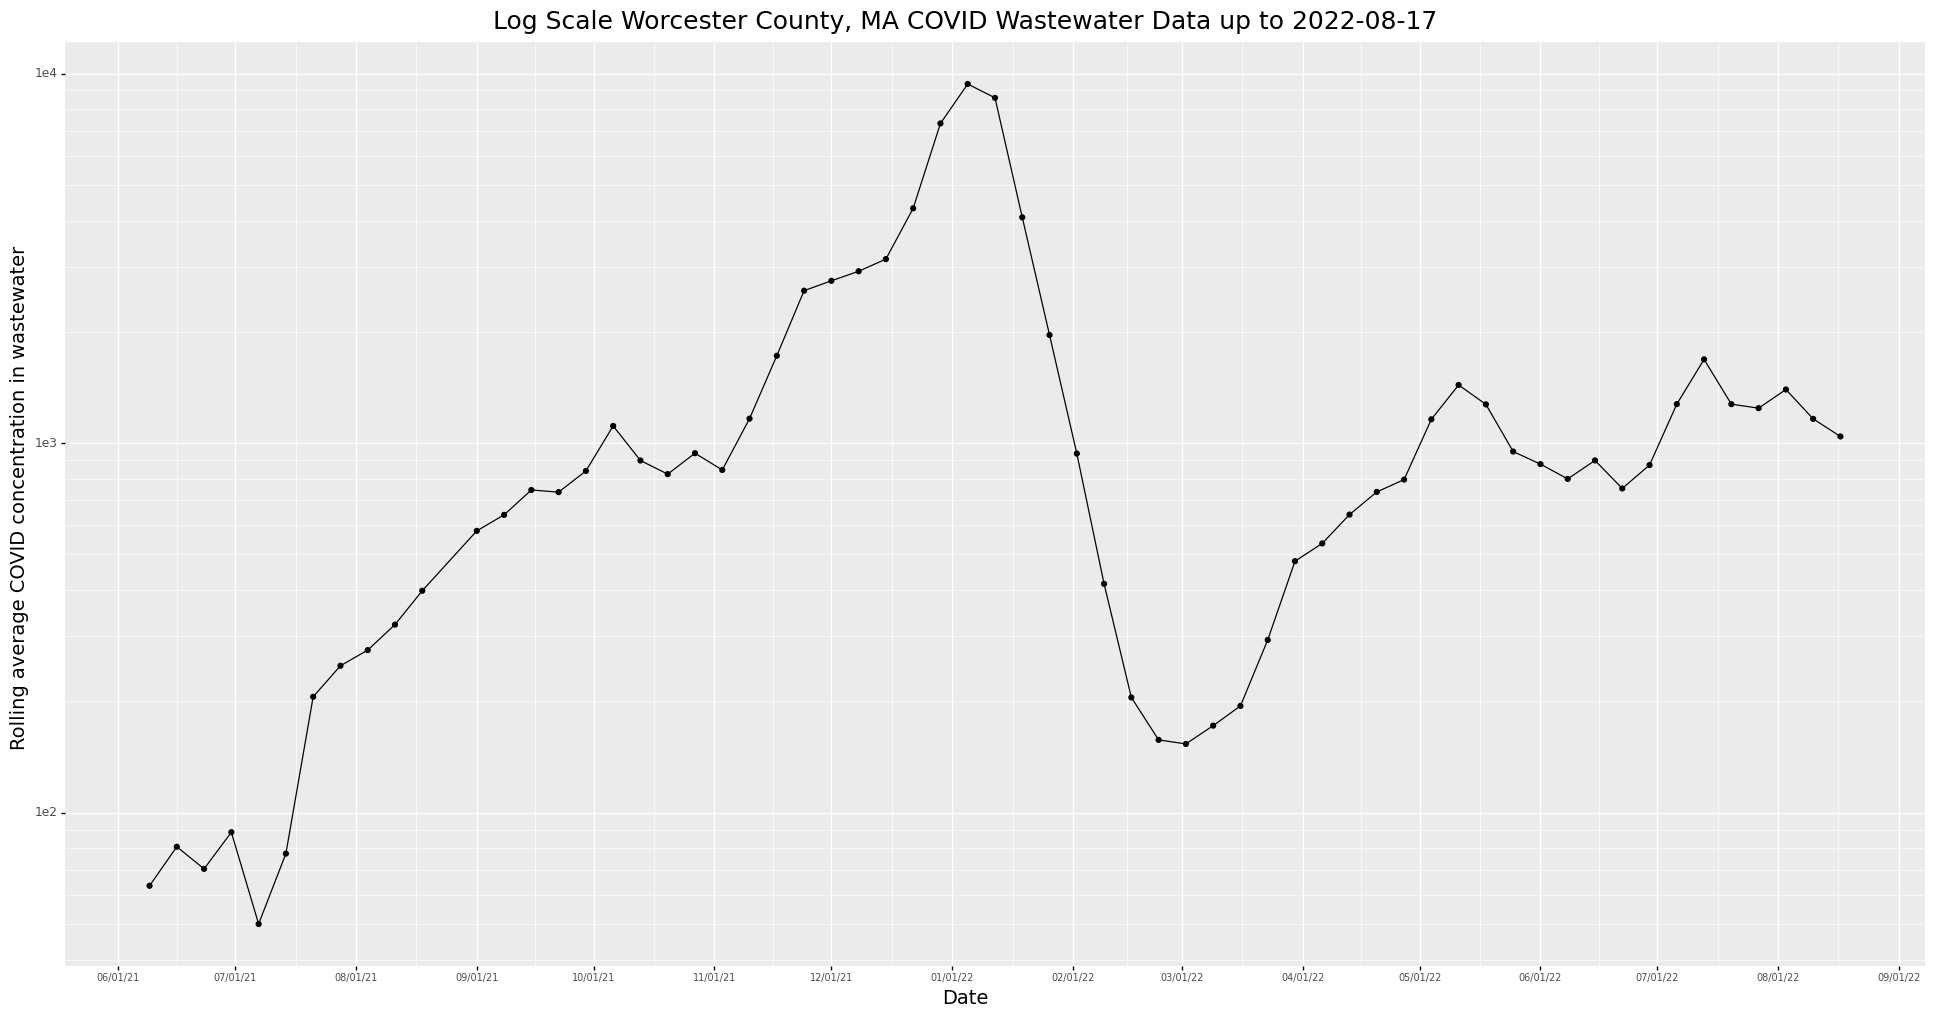

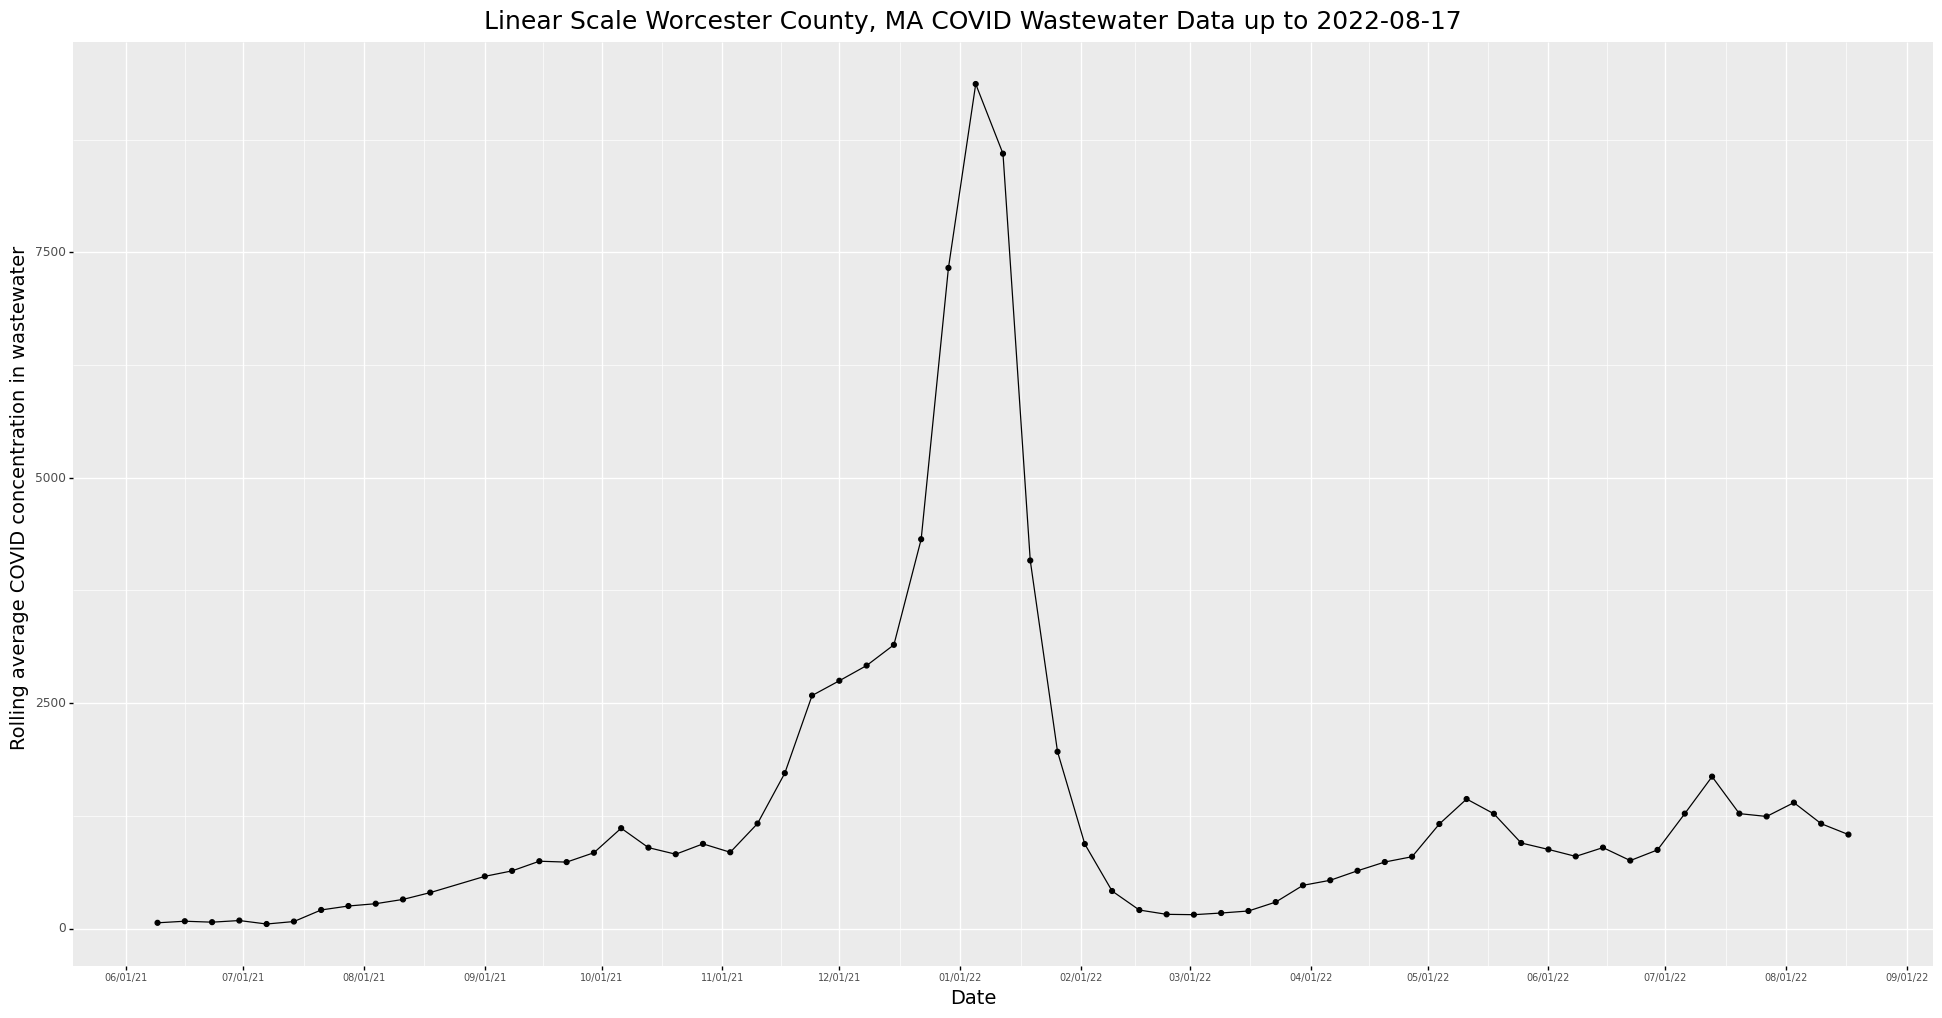

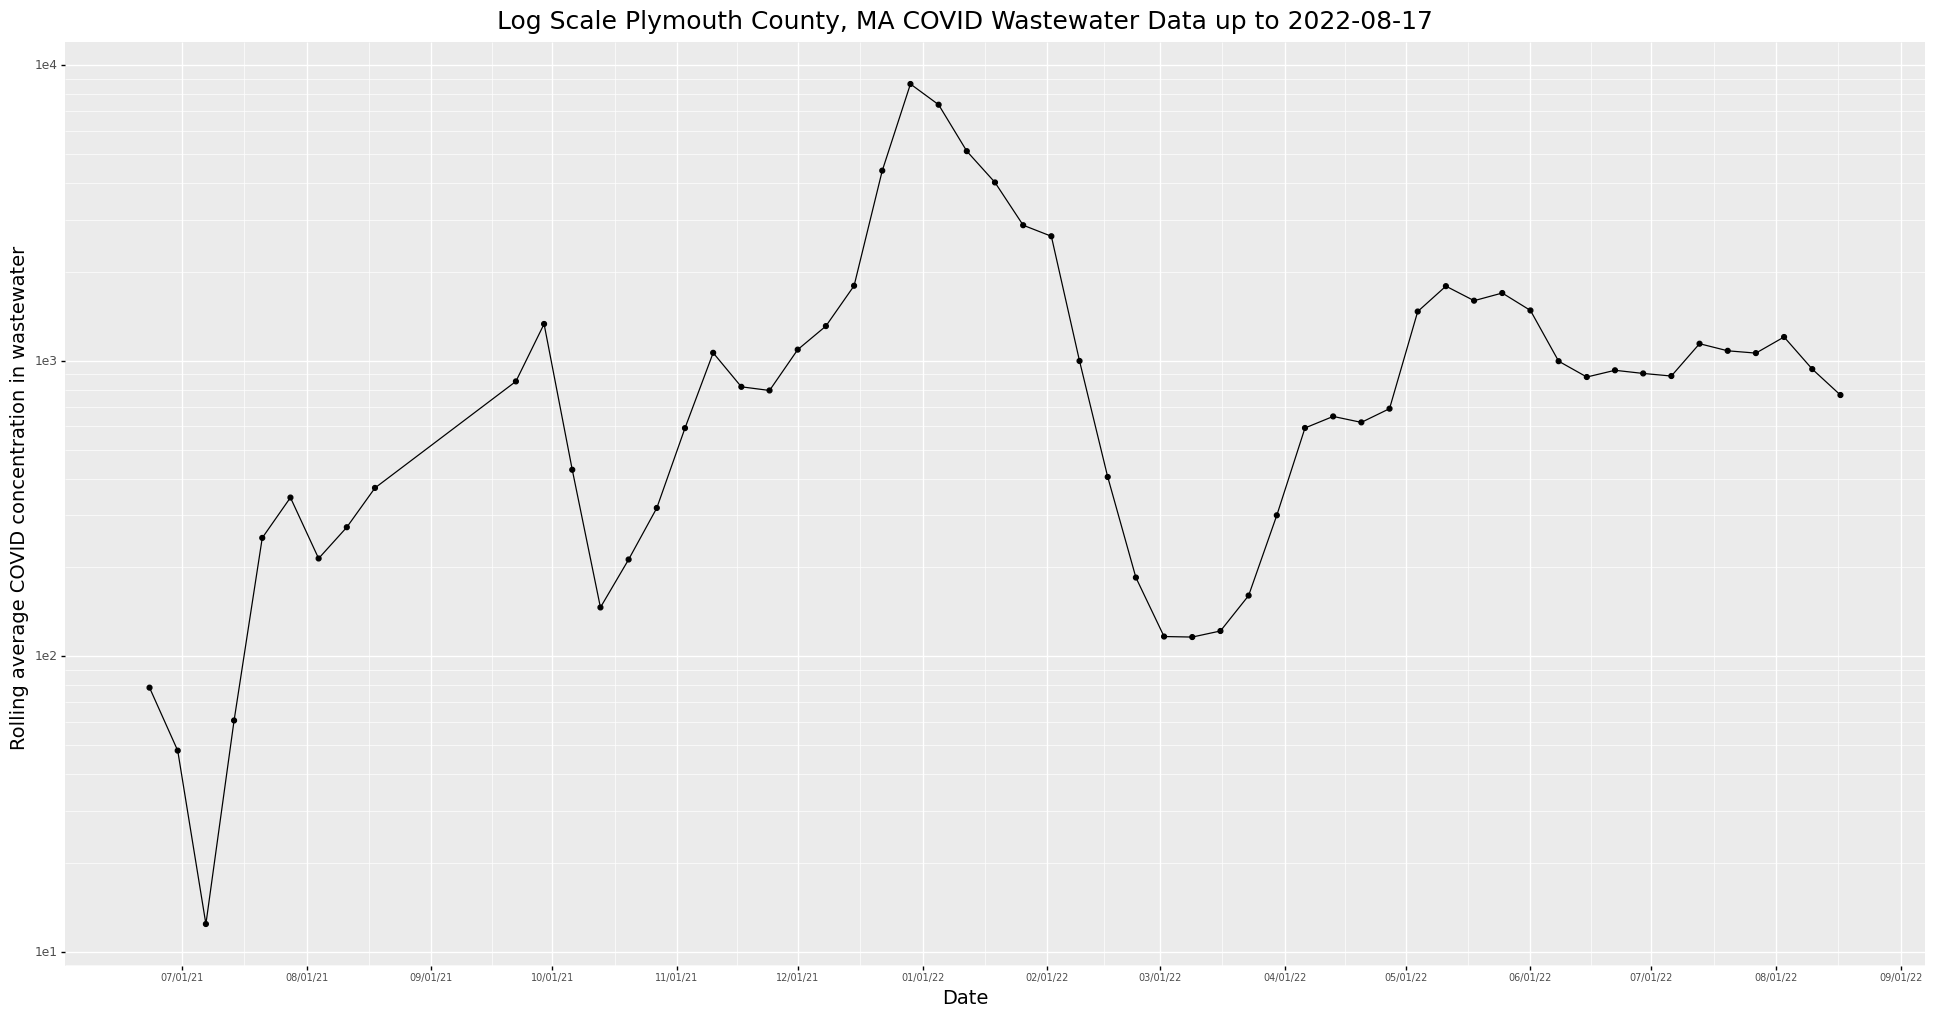

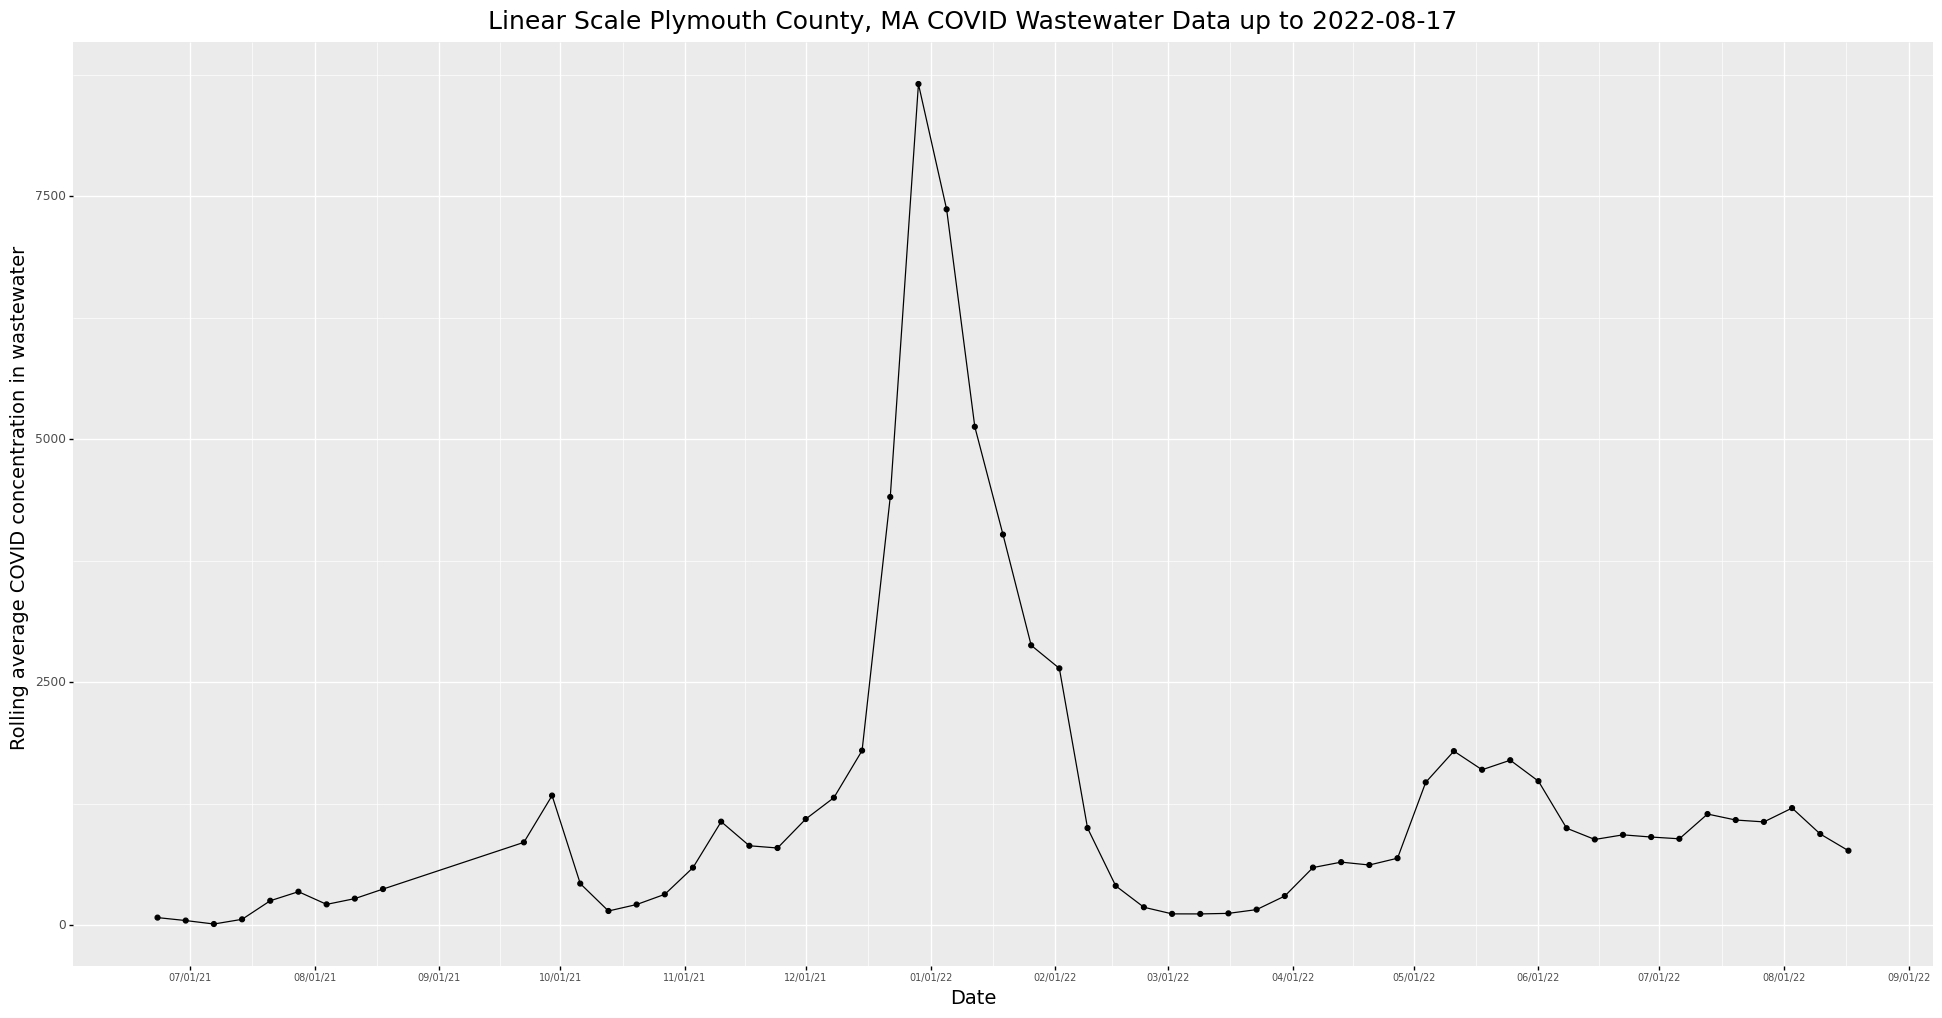

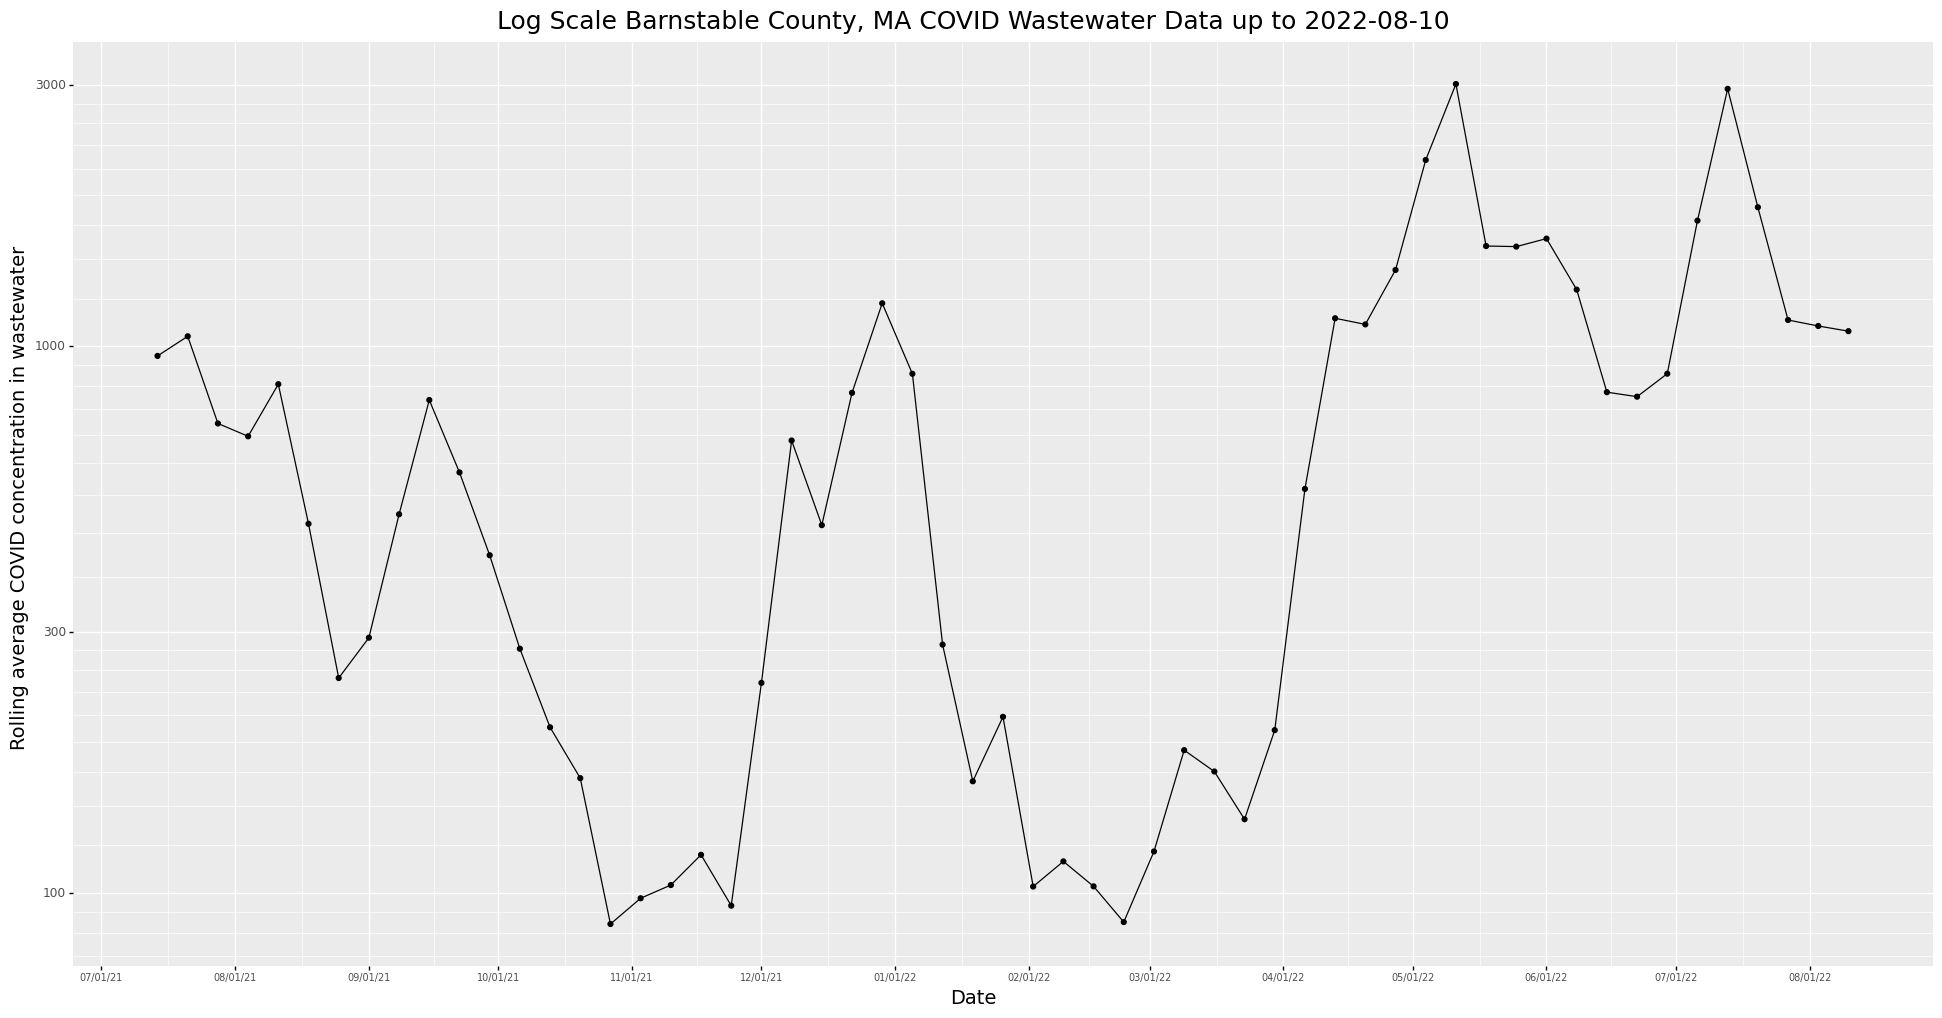

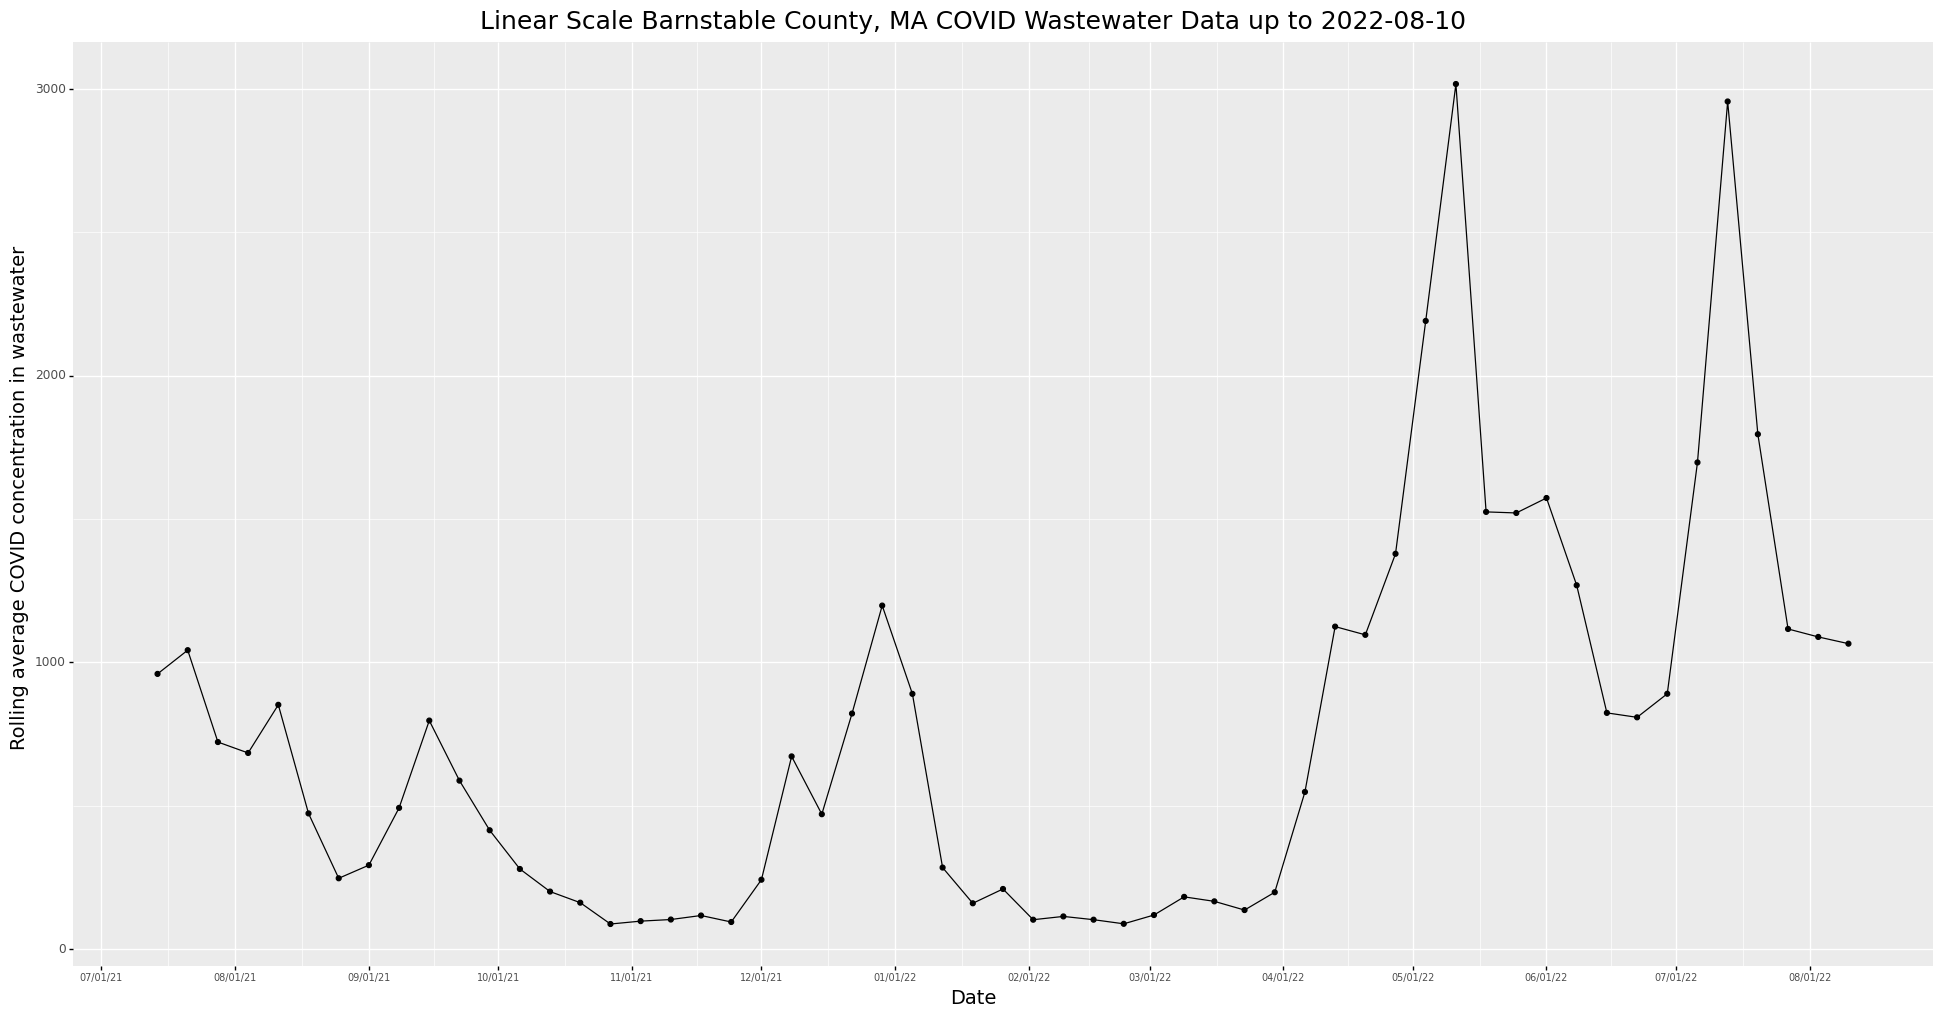

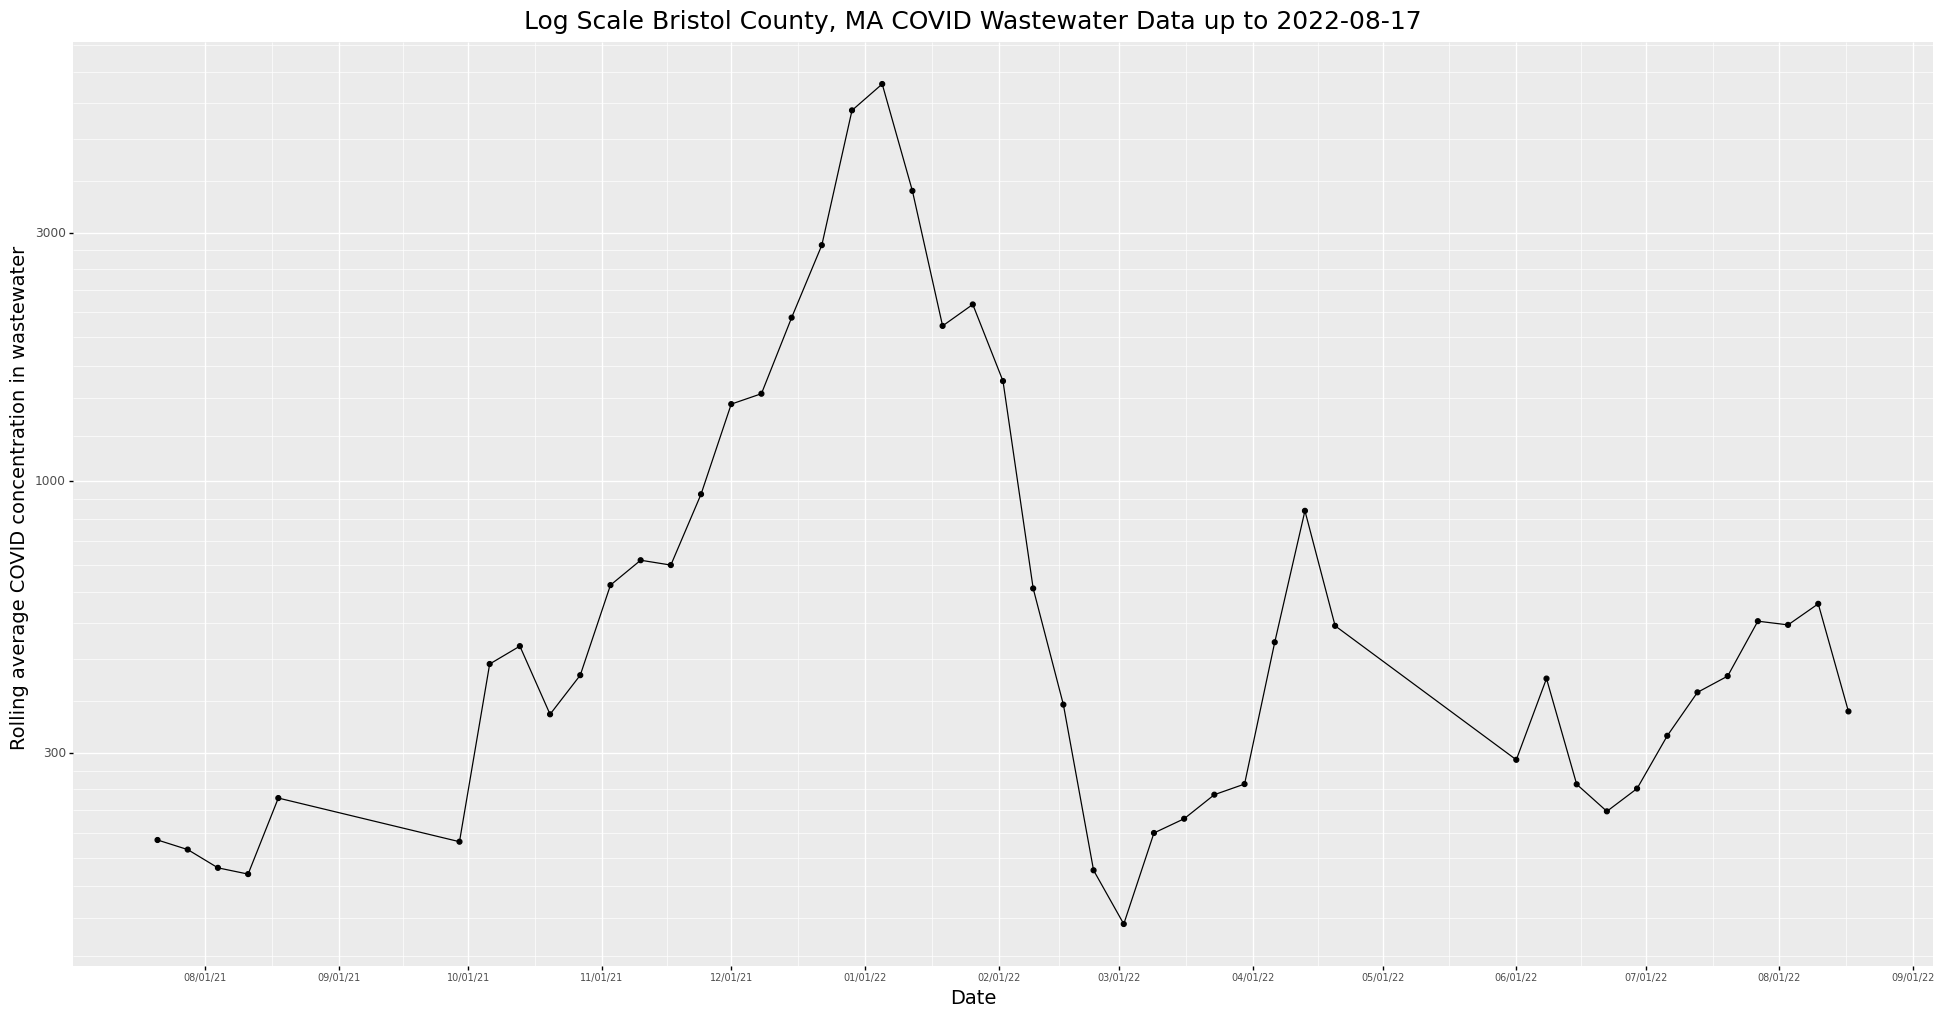

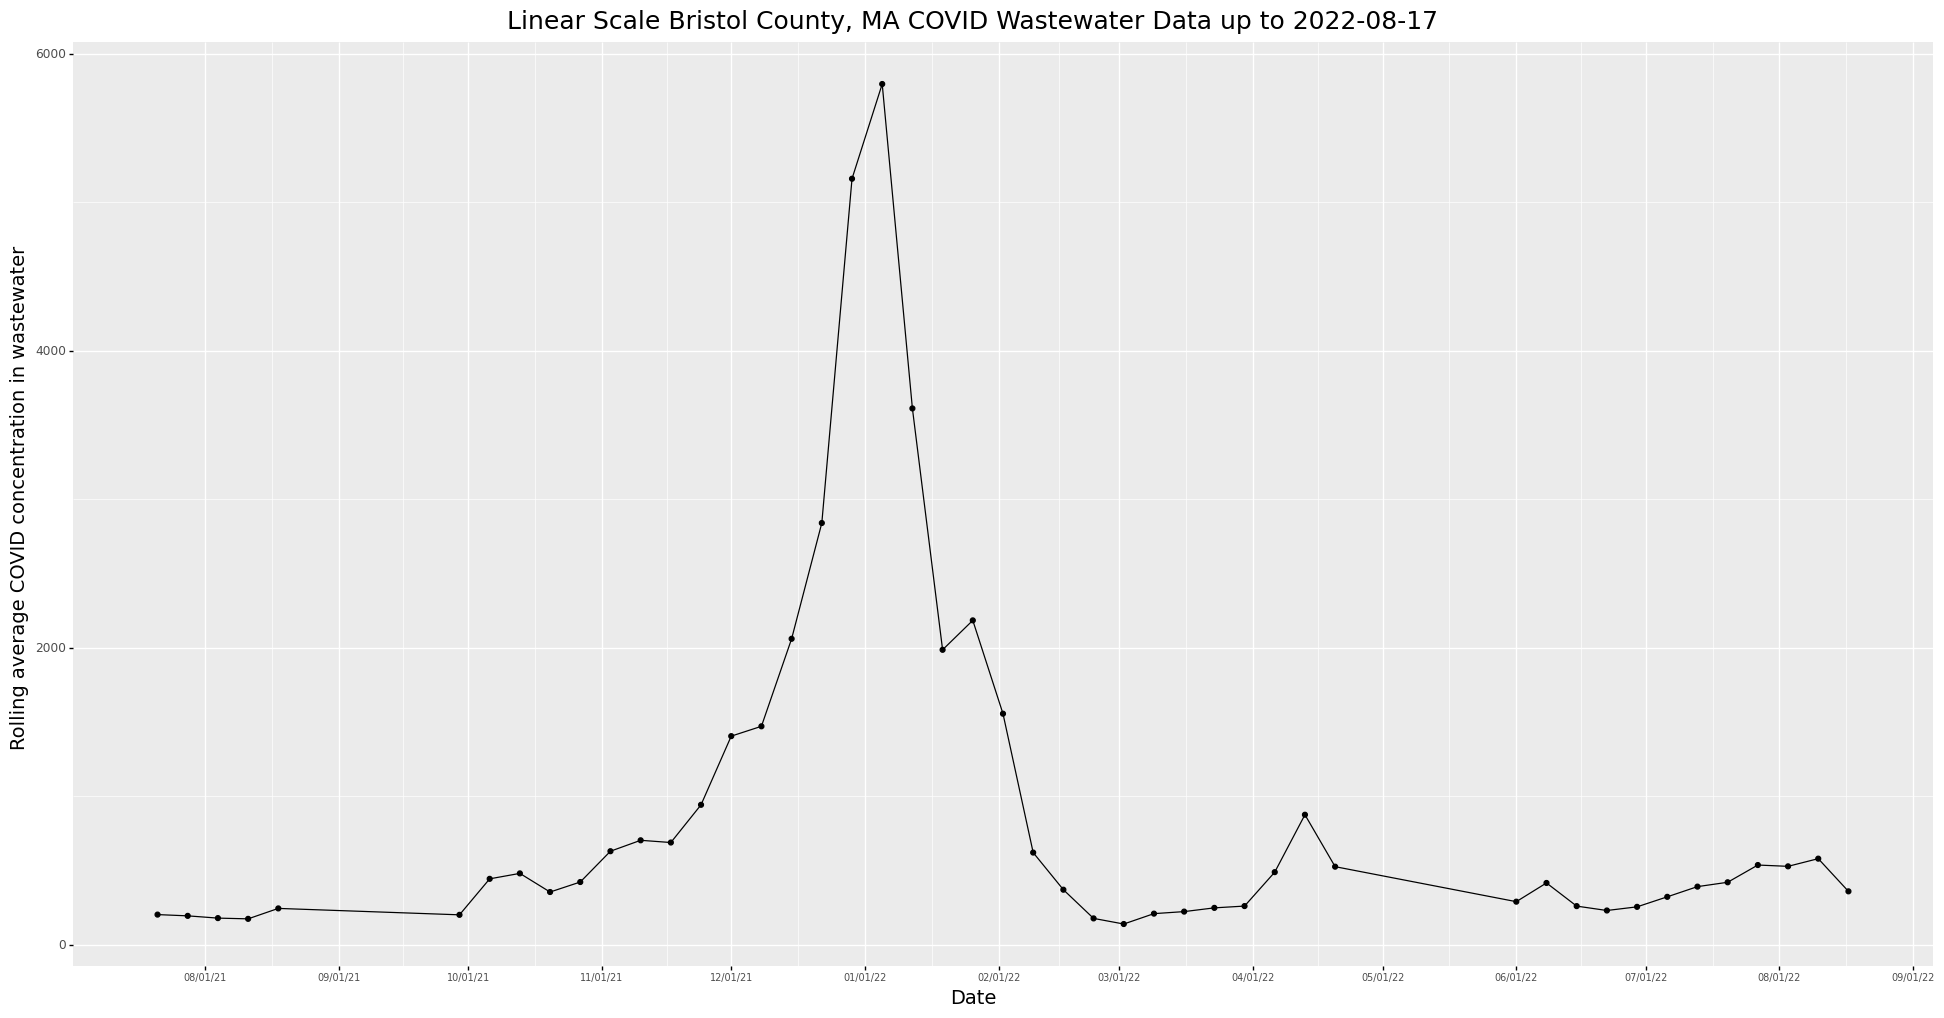

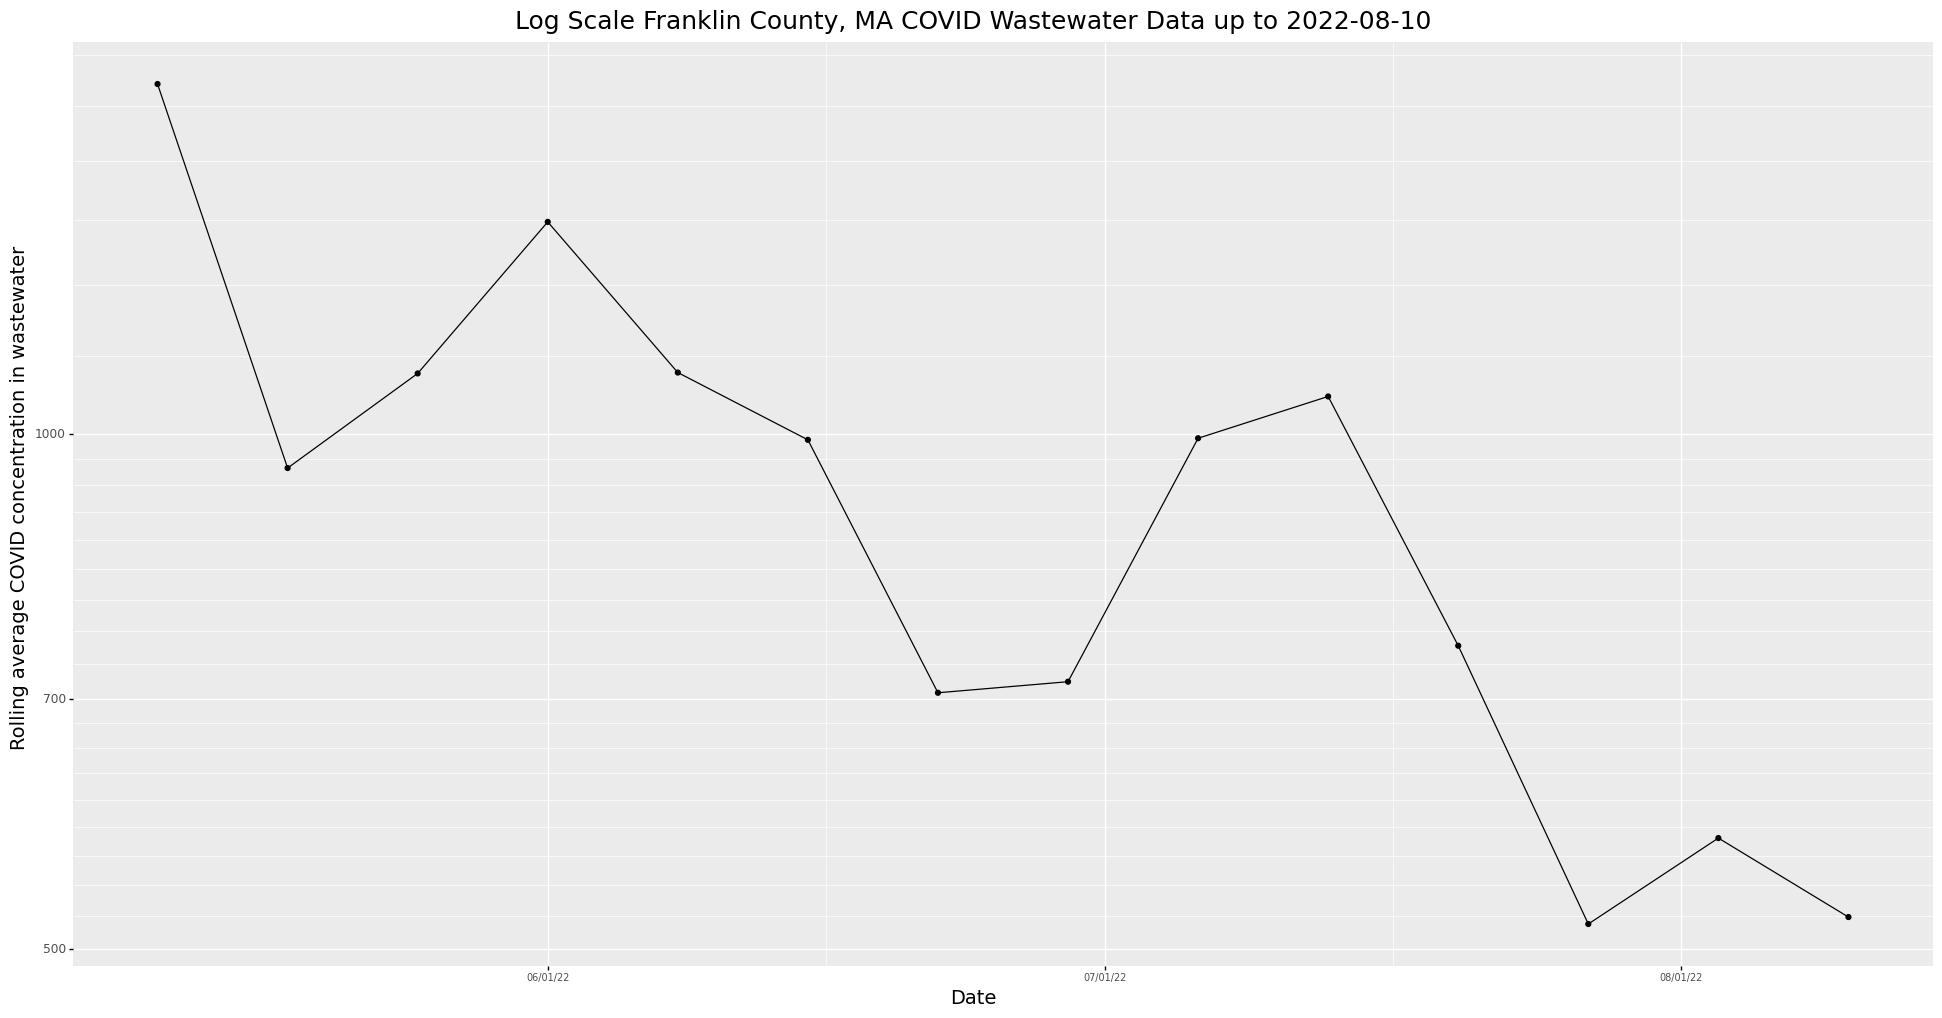

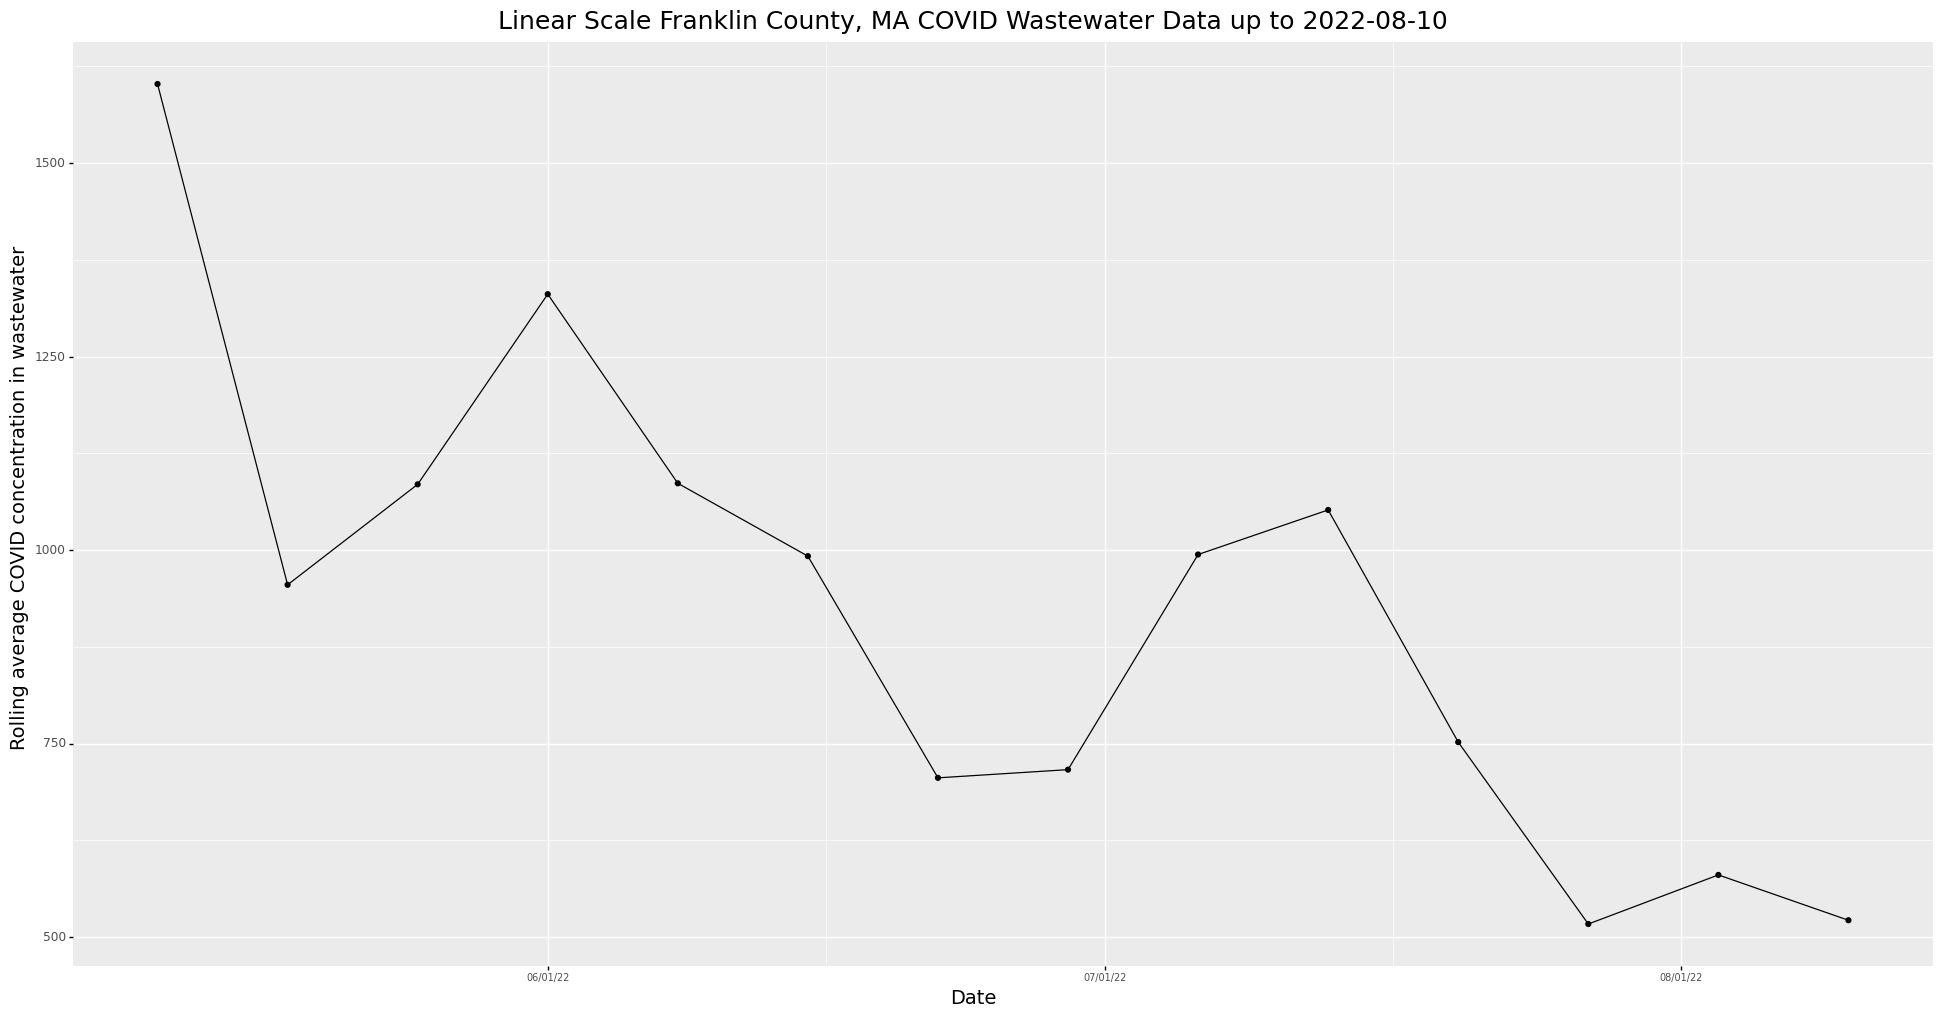

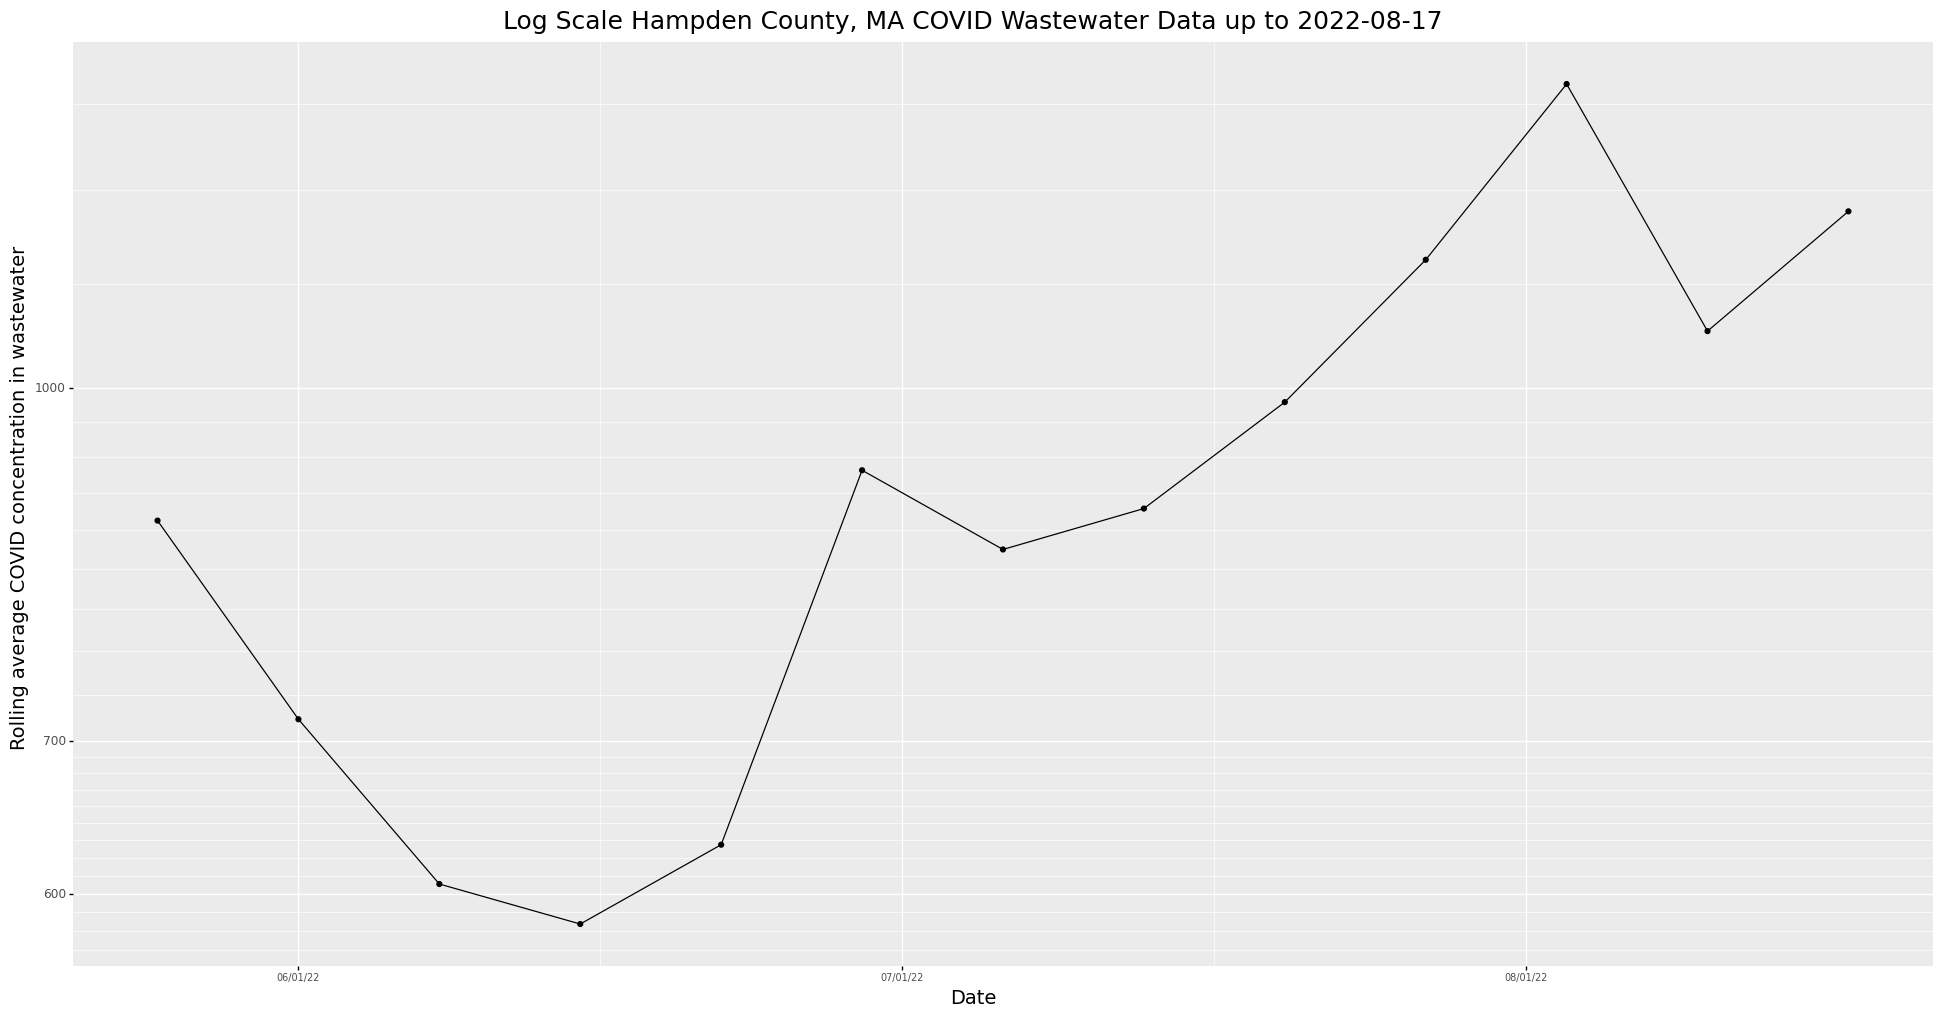

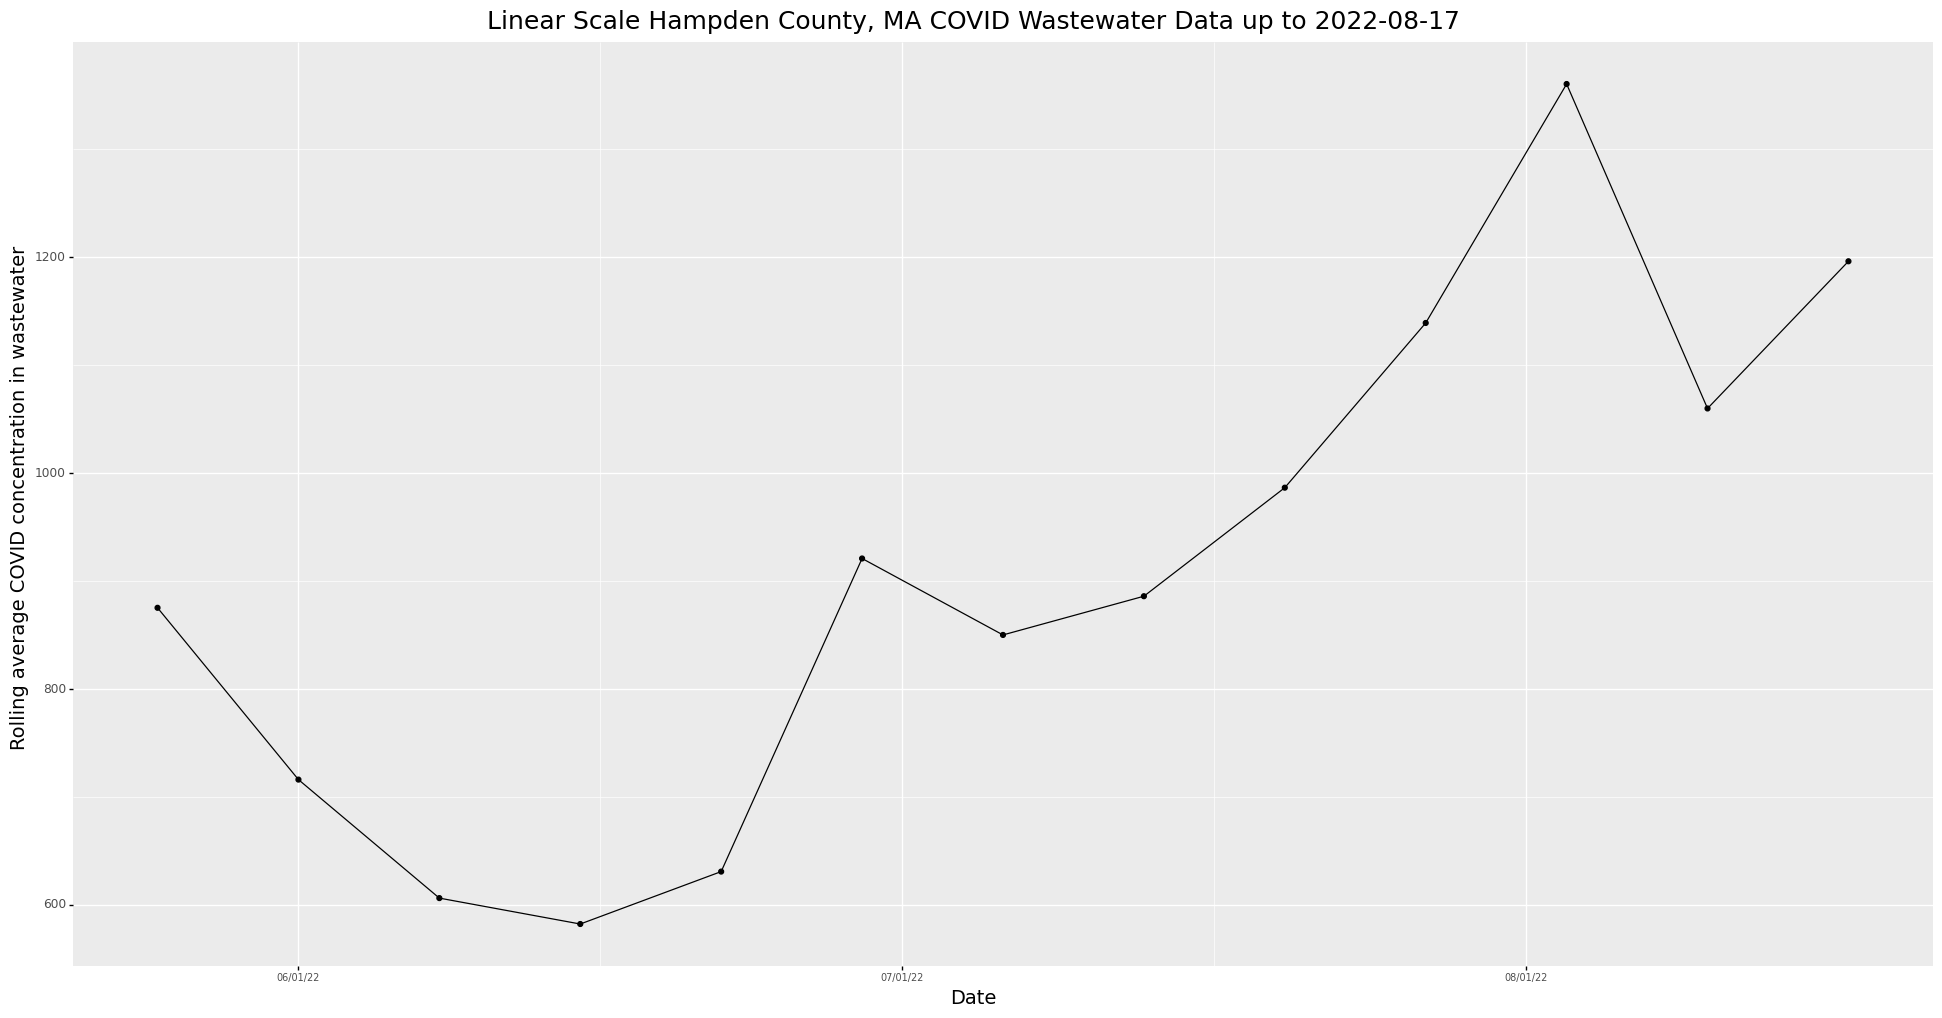

In [18]:
for county in maCounties:
    print(county)
    log = plot_log_covid(county)
    log.draw()
    linear = plot_linear_covid(county)
    linear.draw()